In [1]:
# %load_ext autoreload 
# %autoreload 2

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from itertools import zip_longest

varr = {}
varr['main_path'] = "C:\\Users\\jamilah\\Documents\\Github_analysis_PROJECTS\\Time_series_analysis\\Motor_classification\\Motor_classification"  
varr['main_path1'] = "%s\\a_data_standardization" % (varr['main_path'])
varr['main_path2'] = "%s\\b_data_preprocessing" % (varr['main_path'])
varr['main_path3'] = "%s\\c_calculate_metrics" % (varr['main_path'])

import sys
sys.path.insert(1, '%s' % (varr['main_path']))


from c_calculate_metrics.put_scalar_trialdata_into_pandas import *
from c_calculate_metrics.put_timeseries_trialdata_into_pandas import *

from subfunctions.make_a_properlist import *
from subfunctions.confidence_interval import *
from subfunctions.two_sample_stats import *
from subfunctions.semi_automated_gen import *
from subfunctions.my_dropna_python import *
from subfunctions.compare_condi import compare_across_condi, compare_within_condi

df_scalarmetics_exp = put_scalar_trialdata_into_pandas(varr)
df_timeseries_exp = put_timeseries_trialdata_into_pandas(varr)

C:\Users\jamilah\Documents\Github_analysis_PROJECTS\Time_series_analysis\Motor_classification\Motor_classification\c_calculate_metrics\put_scalar_trialdata_into_pandas.py:44: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  dat = np.array(dat)
C:\Users\jamilah\Documents\Github_analysis_PROJECTS\Time_series_analysis\Motor_classification\Motor_classification\c_calculate_metrics\put_scalar_trialdata_into_pandas.py:49: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  X = np.array(X)
C:\Users\jamilah\AppData\Roaming\Python\Python39\site-packages\numpy\core\_asarr

# Testing if data is correct : 

In [2]:
print('shape of df_scalarmetics_exp[rot] : ', df_scalarmetics_exp['rot'].shape)
df_scalarmetics_exp['rot'].tail()

shape of df_scalarmetics_exp[rot] :  (442, 13)


,subject,tr,ss,ax,new3_ind_st,new3_ind_end,trnum_org,SSQ_b4,SSQ_af,SSQ_diff,FRT_em,res_type,TR
437,17,16,-1,2,5066,5252,28.0,"[0, 1, 0, 1]","[2, 3, 2, 5]","[-2, -2, -2, -4]",3.908,7,18.499999
438,17,17,2,0,5627,5790,31.0,"[0, 1, 0, 1]","[2, 3, 2, 5]","[-2, -2, -2, -4]",2.66,7,16.199999
439,17,18,-2,0,5974,6136,33.0,"[0, 1, 0, 1]","[2, 3, 2, 5]","[-2, -2, -2, -4]",1.668,6,16.100001
440,17,19,0,1,6141,6367,34.0,"[0, 1, 0, 1]","[2, 3, 2, 5]","[-2, -2, -2, -4]",8.04,10,7.8
441,17,20,-1,0,7475,7643,41.0,"[0, 1, 0, 1]","[2, 3, 2, 5]","[-2, -2, -2, -4]",5.256,7,16.7


In [3]:
print('shape of df_scalarmetics_exp[trans] : ', df_scalarmetics_exp['trans'].shape)
df_scalarmetics_exp['trans'].tail()

shape of df_scalarmetics_exp[trans] :  (209, 13)


,subject,tr,ss,ax,new3_ind_st,new3_ind_end,trnum_org,SSQ_b4,SSQ_af,SSQ_diff,FRT_em,res_type,TR
204,13,12,2,2,14899,15174,34.0,"[1, 0, 0, 1]","[1, 0, 0, 1]","[0, 0, 0, 0]",2.652,1,2.2
205,13,13,1,2,15900,16204,36.0,"[1, 0, 0, 1]","[1, 0, 0, 1]","[0, 0, 0, 0]",1.696,2,0.7
206,13,14,2,2,16936,17156,38.0,"[1, 0, 0, 1]","[1, 0, 0, 1]","[0, 0, 0, 0]",2.688,1,2.2
207,13,15,1,1,18936,19136,41.0,"[1, 0, 0, 1]","[1, 0, 0, 1]","[0, 0, 0, 0]",3.828,2,2.8
208,13,16,1,1,19290,19492,42.0,"[1, 0, 0, 1]","[1, 0, 0, 1]","[0, 0, 0, 0]",5.0,7,20.1


In [4]:
print('shape of df_timeseries_exp[rot] : ', df_timeseries_exp['rot'].shape)
df_timeseries_exp['rot'].tail()

shape of df_timeseries_exp[rot] :  (86006, 19)


,subject,tr,ss,ax,dp,time,res_type,SIGCOM_ax0,SIGCOM_ax1,SIGCOM_ax2,SIG_ax0,SIG_ax1,SIG_ax2,JOY_ax0,JOY_ax1,JOY_ax2,NOISE_ax0,NOISE_ax1,NOISE_ax2
86001,17.0,20.0,-1.0,0.0,163.0,16.300000,7.0,-1.453208,0.804159,-4.699437,-1.514817,0.803347,-4.719625,0.301392,-0.082375,-4.927108,0.850650,0.0,-4.927108
86002,17.0,20.0,-1.0,0.0,164.0,16.400000,7.0,-1.391906,0.804159,-4.699425,-1.461697,0.803352,-4.719593,0.333524,-0.082369,-4.917930,0.902199,0.0,-4.917930
86003,17.0,20.0,-1.0,0.0,165.0,16.500001,7.0,-1.313130,0.804159,-4.699425,-1.382446,0.807940,-4.719292,0.356304,-0.086946,-4.908213,0.953649,0.0,-4.908213
86004,17.0,20.0,-1.0,0.0,166.0,16.599999,7.0,-1.221655,0.804159,-4.699425,-1.284506,0.807370,-4.719829,0.362870,-0.089799,-4.897957,1.004994,0.0,-4.897957
86005,17.0,20.0,-1.0,0.0,167.0,16.700000,7.0,-1.125844,0.804159,-4.699425,-1.179229,0.805081,-4.719719,0.364322,-0.088796,-4.887165,1.056230,0.0,-4.887165


In [5]:
print('shape of df_timeseries_exp[trans] : ', df_timeseries_exp['trans'].shape)
df_timeseries_exp['trans'].head()

shape of df_timeseries_exp[trans] :  (43754, 19)


,subject,tr,ss,ax,dp,time,res_type,SIGCOM_ax0,SIGCOM_ax1,SIGCOM_ax2,SIG_ax0,SIG_ax1,SIG_ax2,JOY_ax0,JOY_ax1,JOY_ax2,NOISE_ax0,NOISE_ax1,NOISE_ax2
0,0.0,0.0,2.0,2.0,0.0,0.0,2.0,-0.0,-0.0,0.000823,103.450195,0.0,100.801331,0.001984,-0.0,-0.964518,-0.0,0.264018,-0.964518
1,0.0,0.0,2.0,2.0,1.0,0.1,2.0,-0.0,-0.0,0.016782,103.449287,0.0,100.800995,0.001984,-0.0,-0.967230,-0.0,0.253904,-0.967230
2,0.0,0.0,2.0,2.0,2.0,0.2,2.0,-0.0,-0.0,0.074691,103.449272,0.0,100.812660,0.001984,0.0,-0.969835,-0.0,0.243761,-0.969835
3,0.0,0.0,2.0,2.0,3.0,0.3,2.0,-0.0,0.0,0.195444,103.448074,0.0,100.881874,0.000667,0.0,-0.972335,-0.0,0.233592,-0.972335
4,0.0,0.0,2.0,2.0,4.0,0.4,2.0,-0.0,0.0,0.393271,103.448715,0.0,101.035278,0.001913,0.0,-0.974728,-0.0,0.223397,-0.974728


In [6]:
def category_stats(incon, inner_name_list, outer_name_list, ax_all_vals, outer2_name, cou, final_temp):

    num_of_tests = 2
    rshift = 0.12
    
    # Vector retrival
    for i in range(len(outer_name_list)):
        vec[i] = semi_automated_gen(incon, outer_name_list[i], ax_all_vals, inner_name_list, outer_name_list)
    
    # Statistical tests
    df_res = two_sample_stats(vec[0], vec[1], num_of_tests)
    
    # Saving stats in a DataFrame
    col0 = pd.Series('%s %s %s' % (outer2_name, incon, outer_name_list))  # string
    temp_cur = pd.concat([col0, df_res], axis=1)
    final_temp = pd.concat([temp_cur, final_temp], axis=0)
    
    # Plotting stars
    marg = 2
    if df_res.pval_1.to_numpy()[0] < 0.0167 and df_res.pval_2.to_numpy()[0] < 0.0167:
        row_ind = [i for i in range(len(inner_name_list)) if incon == inner_name_list[i]][0]
        ax[cou-1].text(row_ind-rshift, np.sum(vec[0])+marg, "*", fontsize=22)
        ax[cou].text(row_ind-rshift, np.sum(vec[1])+marg, "*", fontsize=22)
        
    return final_temp

# Combined Count plot with TR plot
**Remember to run the cell twice, for the background of the plot and text to appear correctly.

num_of_sub:  18
nor_IC_vals :  [4.153846153846154, 4.153846153846154]
nor_EC_vals :  [12.461538461538463, 8.307692307692308, 8.307692307692308, 4.153846153846154, 4.153846153846154, 4.153846153846154, 4.153846153846154, 4.153846153846154, 4.153846153846154]
nor_NC_vals :  [8.307692307692308, 8.307692307692308, 4.153846153846154, 4.153846153846154, 4.153846153846154, 4.153846153846154, 4.153846153846154, 4.153846153846154, 4.153846153846154]
nor_NR_vals :  []
num_of_sub:  18
nor_IC_vals :  [3.176470588235294]
nor_EC_vals :  [12.705882352941176, 12.705882352941176, 9.529411764705882, 9.529411764705882, 6.352941176470588, 6.352941176470588, 6.352941176470588, 6.352941176470588, 6.352941176470588, 3.176470588235294, 3.176470588235294, 3.176470588235294, 3.176470588235294, 3.176470588235294]
nor_NC_vals :  [6.352941176470588, 3.176470588235294, 3.176470588235294]
nor_NR_vals :  []
length of ax_all_vals :  (2, 4)
num_of_sub:  18
nor_IC_vals :  [14.086956521739133, 9.391304347826088, 7.043478

C:\Users\jamilah\Documents\Github_analysis_PROJECTS\Time_series_analysis\Motor_classification\Motor_classification\subfunctions\plot_count2subplot2.py:217: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ax_all_vals = np.array(ax_all_vals)
C:\Users\jamilah\Documents\Github_analysis_PROJECTS\Time_series_analysis\Motor_classification\Motor_classification\subfunctions\plot_count2subplot2.py:217: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ax_all_vals = np.array(ax_all_vals)
C:\Users\jamilah\Documents\Github_analysis_PROJECTS\Time_series_analysis\Motor_cla

nor_IC_vals :  [10.5, 9.0, 9.0, 7.5, 4.5, 4.5, 4.5, 4.5, 3.0, 3.0, 1.5, 1.5, 1.5, 1.5, 1.5]
nor_EC_vals :  [1.5, 1.5]
nor_NC_vals :  [1.5, 1.5, 1.5, 1.5, 1.5]
nor_NR_vals :  [4.5, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 1.5, 1.5, 1.5, 1.5, 1.5]
length of ax_all_vals :  (2, 4)
0 RO IC
vec0 :  [4.15384615 4.15384615]
vec1 :  [3.17647059]
vec1 and/or vec2 are less than 2 entries
0 RO EC
length of fix_shSIG :  14
0 RO NC
length of fix_shSIG :  9
0 PI IC
length of fix_shSIG :  18
0 PI EC
vec1 and/or vec2 are less than 2 entries
0 PI NC
vec1 and/or vec2 are less than 2 entries
0 YA IC
length of fix_shSIG :  15
0 YA EC
vec1 and/or vec2 are less than 2 entries
0 YA NC
length of fix_shSIG :  5
0 sub IC
vec1 and/or vec2 are less than 2 entries
vec1 and/or vec2 are less than 2 entries
length of fix_shSIG :  16
0 sub EC
length of fix_shSIG :  9
compare_name2 :  ['EC', 'sub', 'RO', 'PI']
outer_name_list :  ['sub', 'sup']
length of fix_shSIG :  9
compare_name2 :  ['EC', 'sub', 'RO', 'YA']
outer_name_list :  [

C:\Users\jamilah\AppData\Roaming\Python\Python39\site-packages\scipy\stats\morestats.py:2467: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
C:\Users\jamilah\AppData\Roaming\Python\Python39\site-packages\scipy\stats\morestats.py:2467: RuntimeWarning: invalid value encountered in double_scalars
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)



length of fix_shSIG :  18
0 sup EC
vec1 and/or vec2 are less than 2 entries
vec1 and/or vec2 are less than 2 entries
vec1 and/or vec2 are less than 2 entries
0 sup NC
vec1 and/or vec2 are less than 2 entries
length of fix_shSIG :  5
vec1 and/or vec2 are less than 2 entries
Wall time: 445 ms
num_of_sub:  18
nor_IC_vals :  [4.153846153846154, 4.153846153846154]
nor_EC_vals :  [12.461538461538463, 8.307692307692308, 8.307692307692308, 4.153846153846154, 4.153846153846154, 4.153846153846154, 4.153846153846154, 4.153846153846154, 4.153846153846154]
nor_NC_vals :  [8.307692307692308, 8.307692307692308, 4.153846153846154, 4.153846153846154, 4.153846153846154, 4.153846153846154, 4.153846153846154, 4.153846153846154, 4.153846153846154]
nor_NR_vals :  []
num_of_sub:  18
nor_IC_vals :  [3.176470588235294]
nor_EC_vals :  [12.705882352941176, 12.705882352941176, 9.529411764705882, 9.529411764705882, 6.352941176470588, 6.352941176470588, 6.352941176470588, 6.352941176470588, 6.352941176470588, 3.17

C:\Users\jamilah\Documents\Github_analysis_PROJECTS\Time_series_analysis\Motor_classification\Motor_classification\subfunctions\plot_count2subplot2.py:217: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ax_all_vals = np.array(ax_all_vals)


length of ax_all_vals :  (2, 4)
num_of_sub:  18
nor_IC_vals :  [14.086956521739133, 9.391304347826088, 7.043478260869566, 7.043478260869566, 7.043478260869566, 7.043478260869566, 4.695652173913044, 4.695652173913044, 4.695652173913044, 4.695652173913044, 4.695652173913044, 4.695652173913044, 2.347826086956522, 2.347826086956522, 2.347826086956522, 2.347826086956522]
nor_EC_vals :  [2.347826086956522, 2.347826086956522, 2.347826086956522, 2.347826086956522]
nor_NC_vals :  [4.695652173913044, 2.347826086956522]
nor_NR_vals :  [2.347826086956522]
num_of_sub:  18
nor_IC_vals :  [11.283582089552239, 9.671641791044776, 9.671641791044776, 8.059701492537313, 8.059701492537313, 6.447761194029851, 6.447761194029851, 6.447761194029851, 6.447761194029851, 6.447761194029851, 4.835820895522388, 4.835820895522388, 4.835820895522388, 3.2238805970149254, 3.2238805970149254, 1.6119402985074627, 1.6119402985074627, 1.6119402985074627]
nor_EC_vals :  [1.6119402985074627]
nor_NC_vals :  [1.6119402985074627

C:\Users\jamilah\Documents\Github_analysis_PROJECTS\Time_series_analysis\Motor_classification\Motor_classification\subfunctions\plot_count2subplot2.py:217: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ax_all_vals = np.array(ax_all_vals)


length of ax_all_vals :  (2, 4)
num_of_sub:  18
nor_IC_vals :  [10.8, 8.100000000000001, 5.4, 5.4, 5.4, 5.4, 2.7, 2.7, 2.7, 2.7, 2.7]
nor_EC_vals :  [5.4, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7]
nor_NC_vals :  [2.7, 2.7, 2.7, 2.7]
nor_NR_vals :  [5.4, 2.7, 2.7, 2.7, 2.7, 2.7]
num_of_sub:  18
nor_IC_vals :  [10.5, 9.0, 9.0, 7.5, 4.5, 4.5, 4.5, 4.5, 3.0, 3.0, 1.5, 1.5, 1.5, 1.5, 1.5]
nor_EC_vals :  [1.5, 1.5]
nor_NC_vals :  [1.5, 1.5, 1.5, 1.5, 1.5]
nor_NR_vals :  [4.5, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 1.5, 1.5, 1.5, 1.5, 1.5]


C:\Users\jamilah\Documents\Github_analysis_PROJECTS\Time_series_analysis\Motor_classification\Motor_classification\subfunctions\plot_count2subplot2.py:217: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ax_all_vals = np.array(ax_all_vals)
C:\Users\jamilah\AppData\Roaming\Python\Python39\site-packages\scipy\stats\morestats.py:2467: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
C:\Users\jamilah\AppData\Roaming\Python\Python39\site-packages\scipy\stats\morestats.py:2467: RuntimeWarning: invalid value encountered in double_scalars
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)


length of ax_all_vals :  (2, 4)
0 RO IC
vec0 :  [4.15384615 4.15384615]
vec1 :  [3.17647059]
vec1 and/or vec2 are less than 2 entries
0 RO EC
length of fix_shSIG :  14
0 RO NC
length of fix_shSIG :  9
0 PI IC
length of fix_shSIG :  18
0 PI EC
vec1 and/or vec2 are less than 2 entries
0 PI NC
vec1 and/or vec2 are less than 2 entries
0 YA IC
length of fix_shSIG :  15
0 YA EC
vec1 and/or vec2 are less than 2 entries
0 YA NC
length of fix_shSIG :  5
0 sub IC
vec1 and/or vec2 are less than 2 entries
vec1 and/or vec2 are less than 2 entries
length of fix_shSIG :  16
0 sub EC
length of fix_shSIG :  9
compare_name2 :  ['EC', 'sub', 'RO', 'PI']
outer_name_list :  ['sub', 'sup']
length of fix_shSIG :  9
compare_name2 :  ['EC', 'sub', 'RO', 'YA']
outer_name_list :  ['sub', 'sup']
length of fix_shSIG :  8
compare_name2 :  ['EC', 'sub', 'PI', 'YA']
outer_name_list :  ['sub', 'sup']
0 sub NC
vec1 and/or vec2 are less than 2 entries
length of fix_shSIG :  9
compare_name2 :  ['NC', 'sub', 'RO', 'YA']
o

C:\Users\jamilah\AppData\Roaming\Python\Python39\site-packages\scipy\stats\morestats.py:3141: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


vec1 and/or vec2 are less than 2 entries
num_of_sub:  14
nor_IC_vals :  [7.0, 7.0, 7.0, 7.0]
nor_EC_vals :  [21.0, 7.0, 7.0, 7.0, 7.0]
nor_NC_vals :  [7.0]
nor_NR_vals :  []
num_of_sub:  14
nor_IC_vals :  [6.461538461538462, 6.461538461538462, 6.461538461538462]
nor_EC_vals :  [19.384615384615387, 12.923076923076923, 6.461538461538462, 6.461538461538462, 6.461538461538462]
nor_NC_vals :  [6.461538461538462]
nor_NR_vals :  [6.461538461538462]
length of ax_all_vals :  (2, 4)
num_of_sub:  14
nor_IC_vals :  [12.0, 12.0, 12.0]
nor_EC_vals :  [12.0, 12.0]
nor_NC_vals :  [12.0, 12.0]
nor_NR_vals :  []
num_of_sub:  14
nor_IC_vals :  [5.6]
nor_EC_vals :  [16.799999999999997, 11.2, 5.6, 5.6, 5.6, 5.6, 5.6, 5.6, 5.6]
nor_NC_vals :  [11.2]
nor_NR_vals :  []
length of ax_all_vals :  (2, 4)
num_of_sub:  14
nor_IC_vals :  [6.72, 6.72, 6.72, 6.72, 3.36, 3.36, 3.36, 3.36, 3.36, 3.36]
nor_EC_vals :  [10.08, 3.36, 3.36, 3.36, 3.36]
nor_NC_vals :  [6.72, 3.36, 3.36]
nor_NR_vals :  []
num_of_sub:  14


C:\Users\jamilah\Documents\Github_analysis_PROJECTS\Time_series_analysis\Motor_classification\Motor_classification\subfunctions\plot_count2subplot2.py:217: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ax_all_vals = np.array(ax_all_vals)
C:\Users\jamilah\Documents\Github_analysis_PROJECTS\Time_series_analysis\Motor_classification\Motor_classification\subfunctions\plot_count2subplot2.py:217: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ax_all_vals = np.array(ax_all_vals)
C:\Users\jamilah\Documents\Github_analysis_PROJECTS\Time_series_analysis\Motor_cla

nor_IC_vals :  [10.24390243902439, 10.24390243902439, 8.195121951219512, 6.146341463414634, 6.146341463414634, 4.097560975609756, 4.097560975609756, 4.097560975609756, 2.048780487804878, 2.048780487804878, 2.048780487804878, 2.048780487804878, 2.048780487804878]
nor_EC_vals :  [2.048780487804878, 2.048780487804878, 2.048780487804878, 2.048780487804878]
nor_NC_vals :  [4.097560975609756]
nor_NR_vals :  [2.048780487804878, 2.048780487804878, 2.048780487804878, 2.048780487804878]
length of ax_all_vals :  (2, 4)
1 LR IC
length of fix_shSIG :  4
1 LR EC
length of fix_shSIG :  5
1 LR NC
vec1 and/or vec2 are less than 2 entries
1 FB IC
vec1 and/or vec2 are less than 2 entries
1 FB EC
vec1 and/or vec2 are less than 2 entries
1 FB NC
vec1 and/or vec2 are less than 2 entries
1 UD IC
length of fix_shSIG :  13
1 UD EC
length of fix_shSIG :  5
1 UD NC
vec1 and/or vec2 are less than 2 entries
1 sub IC
length of fix_shSIG :  4
length of fix_shSIG :  10
compare_name2 :  ['IC', 'sub', 'LR', 'UD']
outer

C:\Users\jamilah\AppData\Roaming\Python\Python39\site-packages\scipy\stats\morestats.py:2467: RuntimeWarning: invalid value encountered in double_scalars
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)


1 sub NC
vec1 and/or vec2 are less than 2 entries
vec1 and/or vec2 are less than 2 entries
vec1 and/or vec2 are less than 2 entries
1 sup IC
vec1 and/or vec2 are less than 2 entries
length of fix_shSIG :  13
vec1 and/or vec2 are less than 2 entries
1 sup EC
length of fix_shSIG :  9
length of fix_shSIG :  5
length of fix_shSIG :  9
compare_name2 :  ['EC', 'sup', 'FB', 'UD']
outer_name_list :  ['sub', 'sup']
1 sup NC
vec1 and/or vec2 are less than 2 entries
vec1 and/or vec2 are less than 2 entries
vec1 and/or vec2 are less than 2 entries
Wall time: 486 ms
num_of_sub:  14
nor_IC_vals :  [7.0, 7.0, 7.0, 7.0]
nor_EC_vals :  [21.0, 7.0, 7.0, 7.0, 7.0]
nor_NC_vals :  [7.0]
nor_NR_vals :  []
num_of_sub:  14
nor_IC_vals :  [6.461538461538462, 6.461538461538462, 6.461538461538462]
nor_EC_vals :  [19.384615384615387, 12.923076923076923, 6.461538461538462, 6.461538461538462, 6.461538461538462]
nor_NC_vals :  [6.461538461538462]
nor_NR_vals :  [6.461538461538462]


C:\Users\jamilah\Documents\Github_analysis_PROJECTS\Time_series_analysis\Motor_classification\Motor_classification\subfunctions\plot_count2subplot2.py:217: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ax_all_vals = np.array(ax_all_vals)


length of ax_all_vals :  (2, 4)
num_of_sub:  14
nor_IC_vals :  [12.0, 12.0, 12.0]
nor_EC_vals :  [12.0, 12.0]
nor_NC_vals :  [12.0, 12.0]
nor_NR_vals :  []
num_of_sub:  14
nor_IC_vals :  [5.6]
nor_EC_vals :  [16.799999999999997, 11.2, 5.6, 5.6, 5.6, 5.6, 5.6, 5.6, 5.6]
nor_NC_vals :  [11.2]
nor_NR_vals :  []


C:\Users\jamilah\Documents\Github_analysis_PROJECTS\Time_series_analysis\Motor_classification\Motor_classification\subfunctions\plot_count2subplot2.py:217: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ax_all_vals = np.array(ax_all_vals)


length of ax_all_vals :  (2, 4)
num_of_sub:  14
nor_IC_vals :  [6.72, 6.72, 6.72, 6.72, 3.36, 3.36, 3.36, 3.36, 3.36, 3.36]
nor_EC_vals :  [10.08, 3.36, 3.36, 3.36, 3.36]
nor_NC_vals :  [6.72, 3.36, 3.36]
nor_NR_vals :  []
num_of_sub:  14
nor_IC_vals :  [10.24390243902439, 10.24390243902439, 8.195121951219512, 6.146341463414634, 6.146341463414634, 4.097560975609756, 4.097560975609756, 4.097560975609756, 2.048780487804878, 2.048780487804878, 2.048780487804878, 2.048780487804878, 2.048780487804878]
nor_EC_vals :  [2.048780487804878, 2.048780487804878, 2.048780487804878, 2.048780487804878]
nor_NC_vals :  [4.097560975609756]
nor_NR_vals :  [2.048780487804878, 2.048780487804878, 2.048780487804878, 2.048780487804878]


C:\Users\jamilah\Documents\Github_analysis_PROJECTS\Time_series_analysis\Motor_classification\Motor_classification\subfunctions\plot_count2subplot2.py:217: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ax_all_vals = np.array(ax_all_vals)
C:\Users\jamilah\AppData\Roaming\Python\Python39\site-packages\scipy\stats\morestats.py:2467: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
C:\Users\jamilah\AppData\Roaming\Python\Python39\site-packages\scipy\stats\morestats.py:2467: RuntimeWarning: invalid value encountered in double_scalars
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)


length of ax_all_vals :  (2, 4)
1 LR IC
length of fix_shSIG :  4
1 LR EC
length of fix_shSIG :  5
1 LR NC
vec1 and/or vec2 are less than 2 entries
1 FB IC
vec1 and/or vec2 are less than 2 entries
1 FB EC
vec1 and/or vec2 are less than 2 entries
1 FB NC
vec1 and/or vec2 are less than 2 entries
1 UD IC
length of fix_shSIG :  13
1 UD EC
length of fix_shSIG :  5
1 UD NC
vec1 and/or vec2 are less than 2 entries
1 sub IC
length of fix_shSIG :  4
length of fix_shSIG :  10
compare_name2 :  ['IC', 'sub', 'LR', 'UD']
outer_name_list :  ['sub', 'sup']
length of fix_shSIG :  10
compare_name2 :  ['IC', 'sub', 'FB', 'UD']
outer_name_list :  ['sub', 'sup']
1 sub EC
vec1 and/or vec2 are less than 2 entries
length of fix_shSIG :  5
vec1 and/or vec2 are less than 2 entries
1 sub NC
vec1 and/or vec2 are less than 2 entries
vec1 and/or vec2 are less than 2 entries
vec1 and/or vec2 are less than 2 entries
1 sup IC
vec1 and/or vec2 are less than 2 entries
length of fix_shSIG :  13
vec1 and/or vec2 are less 

C:\Users\jamilah\AppData\Roaming\Python\Python39\site-packages\scipy\stats\morestats.py:3141: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
C:\Users\jamilah\AppData\Roaming\Python\Python39\site-packages\scipy\stats\morestats.py:3155: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


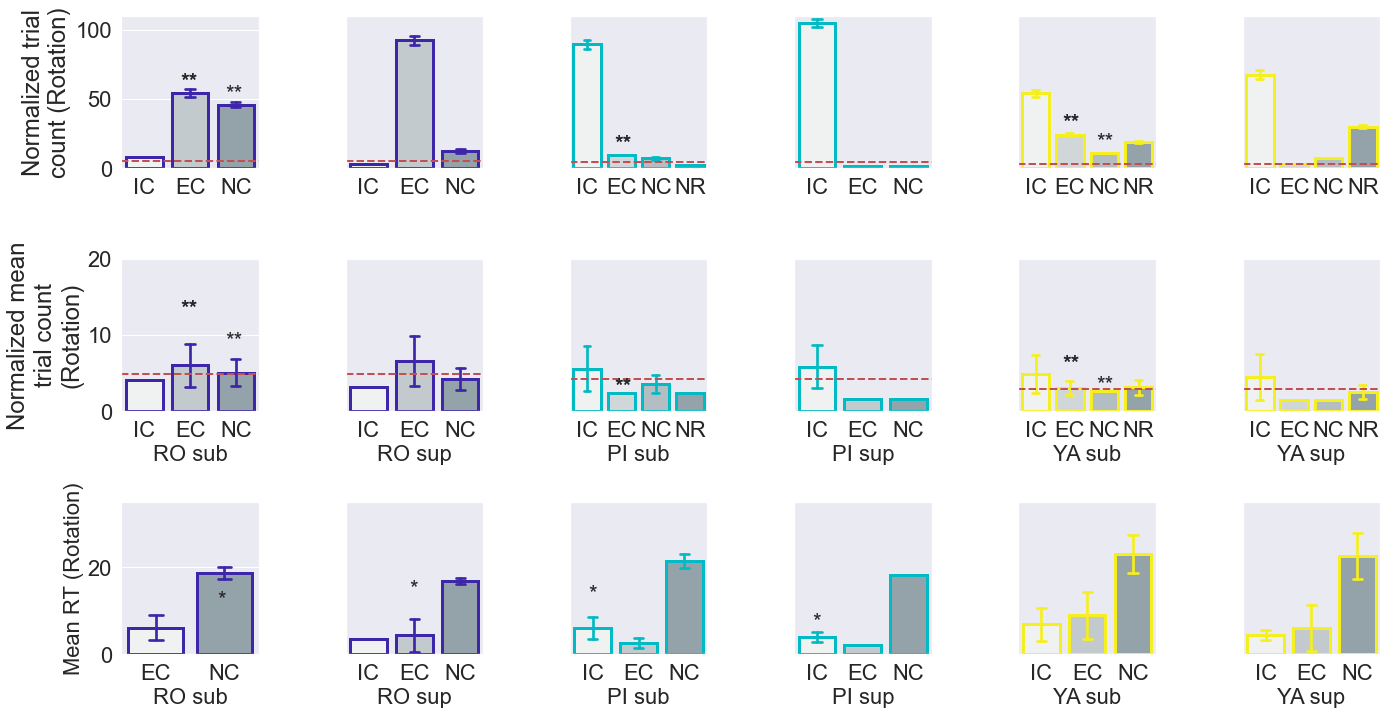

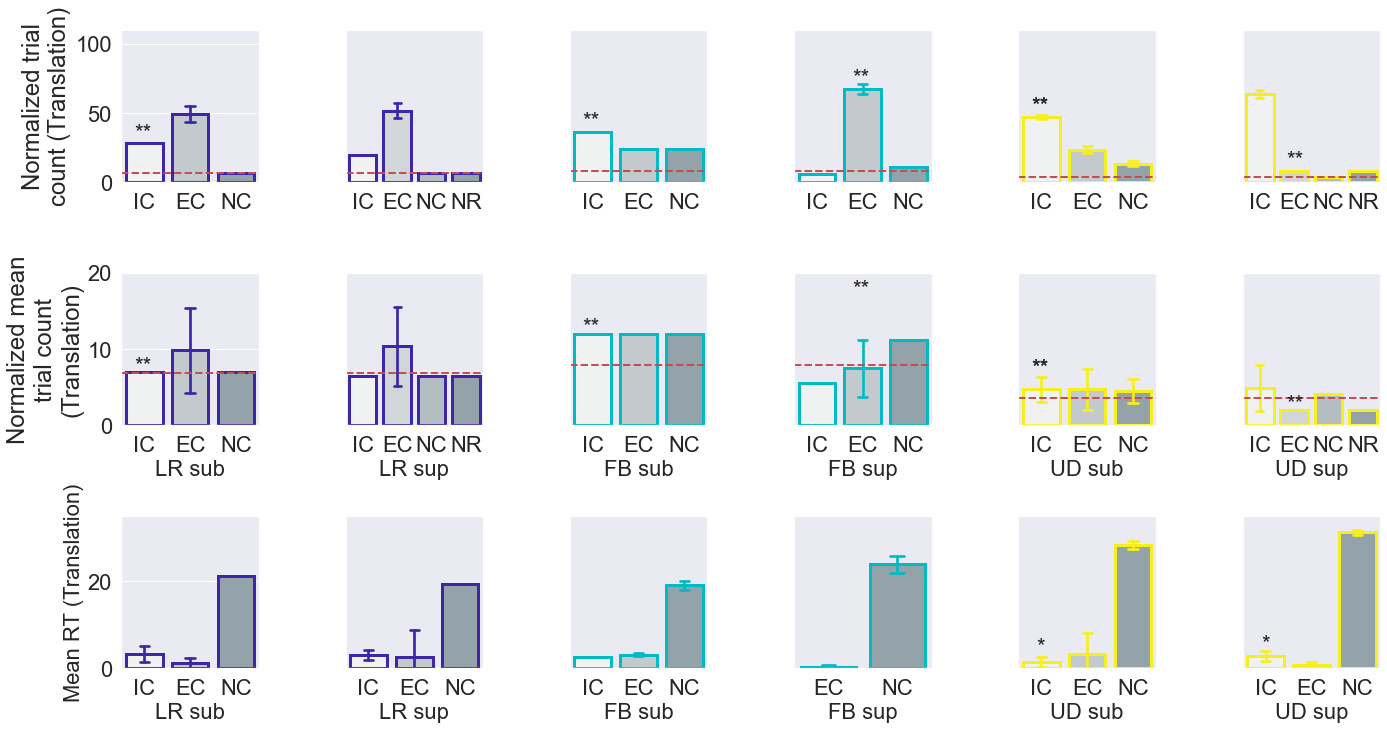

In [14]:
from subfunctions.plot_TR2subplot import *
from subfunctions.plot_count2subplot2 import *

dfexp_count_acrosscondi = pd.DataFrame()
dfexp_count_withincondi = pd.DataFrame()

dfexp_TR_acrosscondi = pd.DataFrame()
dfexp_TR_withincondi = pd.DataFrame()

# eval_axis_dir = 'all_ax' # 'all_ax' = combine negative and positive axes
eval_axis_dir = 'pos_ax' # 'pos_ax' = positive axes only
# eval_axis_dir = 'neg_ax' # 'neg_ax' = negative axes only

for exp in range(2):
    if exp == 0:
        exp_name = 'Rotation'
        anom = 'RO', 'PI', 'YA'
    else:
        exp_name = 'Translation'
        anom = 'LR', 'FB', 'UD'

    fig, ax = plt.subplots(3, 6, figsize=(20,10))
    po = 0
    cou = 0
    estimator_type = 'sum'
    %time cou, count_acrosscondi, count_withincondi, df_long_tot_count = plot_count2subplot2(po, df_scalarmetics_exp, cou, ax, plt, exp, exp_name, anom, estimator_type, eval_axis_dir)
    po = 1
    cou = 0
    estimator_type = 'mean'
    cou, count_acrosscondi, count_withincondi, df_long_tot_count = plot_count2subplot2(po, df_scalarmetics_exp, cou, ax, plt, exp, exp_name, anom, estimator_type, eval_axis_dir)
    po = 2
    cou = 0
    TR_acrosscondi, TR_withincondi, df_long_tot_TR = plot_TR2subplot(po, df_scalarmetics_exp, cou, ax, plt, exp, exp_name, anom, eval_axis_dir)
    
    # Stack both rot and trans into shared dataframes
    dfexp_count_acrosscondi = pd.concat([dfexp_count_acrosscondi, count_acrosscondi], axis=0)
    dfexp_count_withincondi = pd.concat([dfexp_count_withincondi, count_withincondi], axis=0)
    dfexp_TR_acrosscondi = pd.concat([dfexp_TR_acrosscondi, TR_acrosscondi], axis=0)
    dfexp_TR_withincondi = pd.concat([dfexp_TR_withincondi, TR_withincondi], axis=0)
    
    plt.savefig('counts_tr_%s_%s.png' % (exp_name, eval_axis_dir))
 

num_of_sub:  18
nor_IC_vals :  [2.076923076923077, 2.076923076923077]
nor_EC_vals :  [10.384615384615385, 10.384615384615385, 6.230769230769232, 6.230769230769232, 4.153846153846154, 4.153846153846154, 4.153846153846154, 4.153846153846154, 2.076923076923077, 2.076923076923077, 2.076923076923077, 2.076923076923077, 2.076923076923077]
nor_NC_vals :  [8.307692307692308, 6.230769230769232, 6.230769230769232, 4.153846153846154, 2.076923076923077, 2.076923076923077, 2.076923076923077, 2.076923076923077, 2.076923076923077, 2.076923076923077, 2.076923076923077, 2.076923076923077, 2.076923076923077]
nor_NR_vals :  []
num_of_sub:  18
nor_IC_vals :  [1.44]
nor_EC_vals :  [11.52, 11.52, 8.64, 8.64, 7.199999999999999, 7.199999999999999, 4.32, 4.32, 4.32, 4.32, 4.32, 4.32, 2.88, 2.88, 2.88, 2.88, 1.44, 1.44]
nor_NC_vals :  [4.32, 1.44, 1.44, 1.44, 1.44]
nor_NR_vals :  [1.44]


C:\Users\jamilah\Documents\Github_analysis_PROJECTS\Time_series_analysis\Motor_classification\Motor_classification\subfunctions\plot_count2subplot2.py:217: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ax_all_vals = np.array(ax_all_vals)


length of ax_all_vals :  (2, 4)
num_of_sub:  18
nor_IC_vals :  [12.461538461538463, 8.307692307692308, 6.230769230769232, 6.230769230769232, 6.230769230769232, 6.230769230769232, 4.153846153846154, 4.153846153846154, 4.153846153846154, 4.153846153846154, 4.153846153846154, 4.153846153846154, 2.076923076923077, 2.076923076923077, 2.076923076923077, 2.076923076923077]
nor_EC_vals :  [4.153846153846154, 4.153846153846154, 2.076923076923077, 2.076923076923077, 2.076923076923077]
nor_NC_vals :  [6.230769230769232, 4.153846153846154, 2.076923076923077]
nor_NR_vals :  [2.076923076923077]
num_of_sub:  18
nor_IC_vals :  [11.117647058823529, 9.529411764705882, 9.529411764705882, 7.941176470588235, 7.941176470588235, 6.352941176470588, 6.352941176470588, 6.352941176470588, 6.352941176470588, 6.352941176470588, 4.764705882352941, 4.764705882352941, 4.764705882352941, 3.176470588235294, 3.176470588235294, 1.588235294117647, 1.588235294117647, 1.588235294117647]
nor_EC_vals :  [1.588235294117647, 1.

C:\Users\jamilah\Documents\Github_analysis_PROJECTS\Time_series_analysis\Motor_classification\Motor_classification\subfunctions\plot_count2subplot2.py:217: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ax_all_vals = np.array(ax_all_vals)


length of ax_all_vals :  (2, 4)
num_of_sub:  18
nor_IC_vals :  [7.714285714285714, 5.785714285714286, 3.857142857142857, 3.857142857142857, 3.857142857142857, 3.857142857142857, 1.9285714285714286, 1.9285714285714286, 1.9285714285714286, 1.9285714285714286, 1.9285714285714286]
nor_EC_vals :  [5.785714285714286, 3.857142857142857, 1.9285714285714286, 1.9285714285714286, 1.9285714285714286, 1.9285714285714286, 1.9285714285714286, 1.9285714285714286, 1.9285714285714286, 1.9285714285714286, 1.9285714285714286]
nor_NC_vals :  [3.857142857142857, 1.9285714285714286, 1.9285714285714286, 1.9285714285714286, 1.9285714285714286, 1.9285714285714286]
nor_NR_vals :  [5.785714285714286, 3.857142857142857, 3.857142857142857, 3.857142857142857, 3.857142857142857, 3.857142857142857, 1.9285714285714286, 1.9285714285714286]
num_of_sub:  18
nor_IC_vals :  [8.307692307692308, 7.1208791208791204, 7.1208791208791204, 5.934065934065934, 3.5604395604395602, 3.5604395604395602, 3.5604395604395602, 3.56043956043

C:\Users\jamilah\Documents\Github_analysis_PROJECTS\Time_series_analysis\Motor_classification\Motor_classification\subfunctions\plot_count2subplot2.py:217: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ax_all_vals = np.array(ax_all_vals)
C:\Users\jamilah\AppData\Roaming\Python\Python39\site-packages\scipy\stats\morestats.py:2467: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
C:\Users\jamilah\AppData\Roaming\Python\Python39\site-packages\scipy\stats\morestats.py:3141: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


length of ax_all_vals :  (2, 4)
0 RO IC
vec0 :  [2.07692308 2.07692308]
vec1 :  [1.44]
vec1 and/or vec2 are less than 2 entries
0 RO EC
length of fix_shSIG :  18
0 RO NC
length of fix_shSIG :  13
0 PI IC
length of fix_shSIG :  18
0 PI EC
vec1 and/or vec2 are less than 2 entries
0 PI NC
vec1 and/or vec2 are less than 2 entries
0 YA IC
length of fix_shSIG :  15
0 YA EC
length of fix_shSIG :  11
compare_name2 :  ['EC', 'YA', 'sub', 'sup']
outer_name_list :  ['sub', 'sup']
0 YA NC
length of fix_shSIG :  6
0 sub IC
vec1 and/or vec2 are less than 2 entries
vec1 and/or vec2 are less than 2 entries
length of fix_shSIG :  16
0 sub EC
length of fix_shSIG :  13
length of fix_shSIG :  13
compare_name2 :  ['EC', 'sub', 'RO', 'YA']
outer_name_list :  ['sub', 'sup']
length of fix_shSIG :  11
0 sub NC
length of fix_shSIG :  13
length of fix_shSIG :  13
length of fix_shSIG :  6
0 sup IC
vec1 and/or vec2 are less than 2 entries
vec1 and/or vec2 are less than 2 entries
length of fix_shSIG :  18
0 sup EC


C:\Users\jamilah\Documents\Github_analysis_PROJECTS\Time_series_analysis\Motor_classification\Motor_classification\subfunctions\plot_count2subplot2.py:217: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ax_all_vals = np.array(ax_all_vals)


length of ax_all_vals :  (2, 4)
num_of_sub:  14
nor_IC_vals :  [3.8181818181818183, 3.8181818181818183, 3.8181818181818183]
nor_EC_vals :  [11.454545454545455, 11.454545454545455, 7.636363636363637, 7.636363636363637, 7.636363636363637, 3.8181818181818183, 3.8181818181818183, 3.8181818181818183, 3.8181818181818183]
nor_NC_vals :  [7.636363636363637, 3.8181818181818183]
nor_NR_vals :  []
num_of_sub:  14
nor_IC_vals :  [2.896551724137931]
nor_EC_vals :  [17.379310344827587, 14.482758620689655, 8.689655172413794, 5.793103448275862, 5.793103448275862, 2.896551724137931, 2.896551724137931, 2.896551724137931, 2.896551724137931, 2.896551724137931, 2.896551724137931]
nor_NC_vals :  [5.793103448275862, 5.793103448275862]
nor_NR_vals :  []


C:\Users\jamilah\Documents\Github_analysis_PROJECTS\Time_series_analysis\Motor_classification\Motor_classification\subfunctions\plot_count2subplot2.py:217: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ax_all_vals = np.array(ax_all_vals)


length of ax_all_vals :  (2, 4)
num_of_sub:  14
nor_IC_vals :  [5.25, 5.25, 5.25, 5.25, 2.625, 2.625, 2.625, 2.625, 2.625, 2.625]
nor_EC_vals :  [10.5, 5.25, 2.625, 2.625, 2.625, 2.625, 2.625, 2.625]
nor_NC_vals :  [7.875, 2.625, 2.625, 2.625]
nor_NR_vals :  []
num_of_sub:  14
nor_IC_vals :  [8.235294117647058, 8.235294117647058, 6.588235294117647, 4.9411764705882355, 4.9411764705882355, 3.2941176470588234, 3.2941176470588234, 3.2941176470588234, 1.6470588235294117, 1.6470588235294117, 1.6470588235294117, 1.6470588235294117, 1.6470588235294117]
nor_EC_vals :  [4.9411764705882355, 3.2941176470588234, 3.2941176470588234, 1.6470588235294117, 1.6470588235294117, 1.6470588235294117]
nor_NC_vals :  [3.2941176470588234, 1.6470588235294117, 1.6470588235294117]
nor_NR_vals :  [4.9411764705882355, 1.6470588235294117, 1.6470588235294117, 1.6470588235294117]
length of ax_all_vals :  (2, 4)


C:\Users\jamilah\Documents\Github_analysis_PROJECTS\Time_series_analysis\Motor_classification\Motor_classification\subfunctions\plot_count2subplot2.py:217: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ax_all_vals = np.array(ax_all_vals)
C:\Users\jamilah\AppData\Roaming\Python\Python39\site-packages\scipy\stats\morestats.py:2467: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
C:\Users\jamilah\AppData\Roaming\Python\Python39\site-packages\scipy\stats\morestats.py:2467: RuntimeWarning: invalid value encountered in double_scalars
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
C:\Users\jamilah\AppData\Roaming\Python\Python39\site-packages\scipy\stats\morestats.py:3141:

1 LR IC
length of fix_shSIG :  4
1 LR EC
length of fix_shSIG :  10
1 LR NC
vec1 and/or vec2 are less than 2 entries
1 FB IC
vec1 and/or vec2 are less than 2 entries
1 FB EC
length of fix_shSIG :  11
1 FB NC
vec1 and/or vec2 are less than 2 entries
1 UD IC
length of fix_shSIG :  13
1 UD EC
length of fix_shSIG :  8
1 UD NC
length of fix_shSIG :  4
1 sub IC
length of fix_shSIG :  4
length of fix_shSIG :  10
length of fix_shSIG :  10
1 sub EC
length of fix_shSIG :  9
length of fix_shSIG :  9
length of fix_shSIG :  9
compare_name2 :  ['EC', 'sub', 'FB', 'UD']
outer_name_list :  ['sub', 'sup']
1 sub NC
vec1 and/or vec2 are less than 2 entries
length of fix_shSIG :  5
vec1 and/or vec2 are less than 2 entries
1 sup IC
vec1 and/or vec2 are less than 2 entries
length of fix_shSIG :  13
vec1 and/or vec2 are less than 2 entries
1 sup EC
length of fix_shSIG :  11
length of fix_shSIG :  10
length of fix_shSIG :  11
1 sup NC
vec1 and/or vec2 are less than 2 entries
vec1 and/or vec2 are less than 2 en

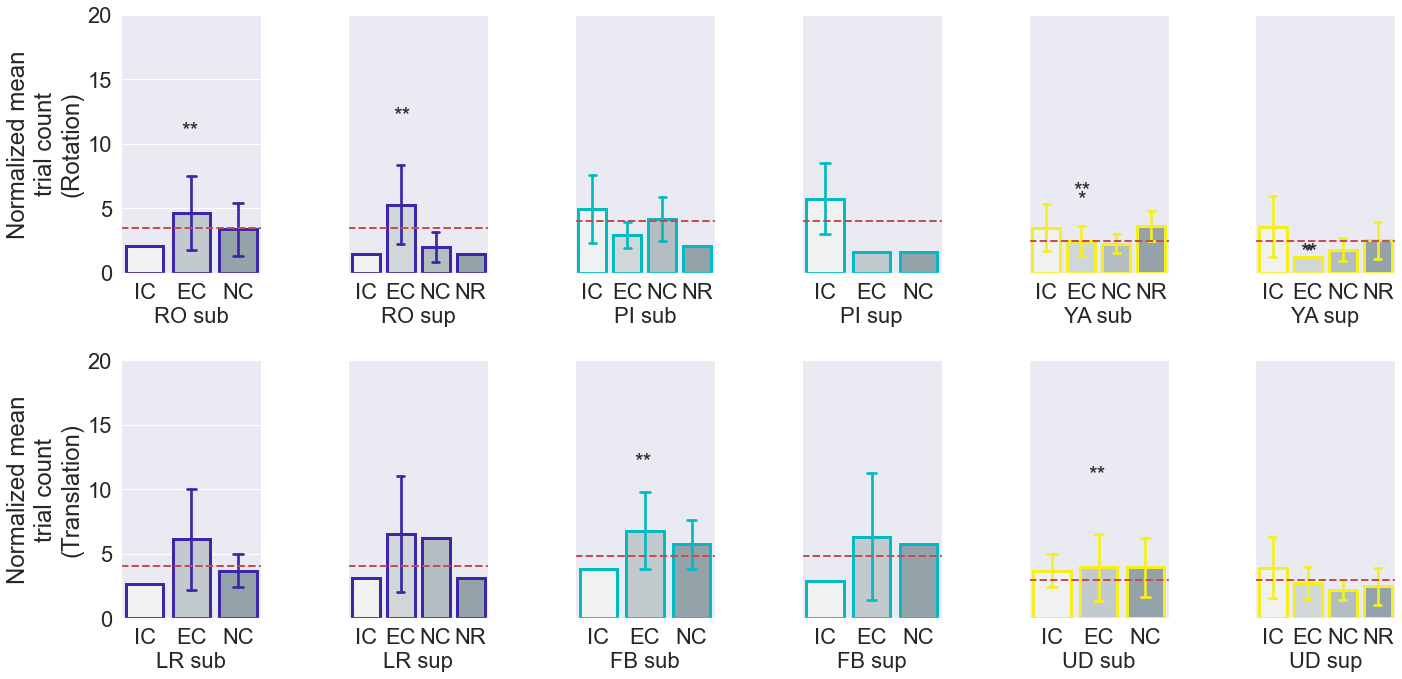

In [15]:
# Plot for normalized count mean : this plot is what people are used to using 
# for evaluating error bars
from subfunctions.plot_count2subplot2 import *

dfexp_mean_count_acrosscondi = pd.DataFrame()
dfexp_mean_count_withincondi = pd.DataFrame()

estimator_type = 'mean'

eval_axis_dir = 'all_ax'  # 'all_ax' = combine negative and positive axes, 'all_ax' = positive axes only, 'neg_ax' = negative axes only

fig, ax = plt.subplots(2, 6, figsize=(20,10))
po = 0
cou = 0
for exp in range(2):
    if exp == 0:
        exp_name = 'Rotation'
        anom = 'RO', 'PI', 'YA'
    else:
        exp_name = 'Translation'
        anom = 'LR', 'FB', 'UD'

    cou, count_acrosscondi, count_withincondi, df_long_tot_mean_count = plot_count2subplot2(po, df_scalarmetics_exp, cou, ax, plt, exp, exp_name, anom, estimator_type, eval_axis_dir)
    po = po + 1
    cou = 0
    
    # Stack both rot and trans into shared dataframes
    dfexp_mean_count_acrosscondi = pd.concat([dfexp_mean_count_acrosscondi, count_acrosscondi], axis=0)
    dfexp_mean_count_withincondi = pd.concat([dfexp_mean_count_withincondi, count_withincondi], axis=0)
    
plt.savefig('meancounts_tr_RotTrans.png')

# Record count and TR statistics

In [ ]:
# Record count statistics for within condition (axis) : single star
dfexp_count_acrosscondi

In [ ]:
# double star
dfexp_count_withincondi

In [ ]:
dfexp_TR_acrosscondi

In [ ]:
dfexp_TR_withincondi

In [ ]:
dfexp_mean_count_acrosscondi

In [ ]:
dfexp_mean_count_withincondi

# Redoing Statistics so that they are more aligned with motion detection literature: group IC+EC and group NC+NR

## Compare across all axes for Rotation and Translation AND condensed Rotation and Translation figure

### Get count data

In [17]:
def get_counts(df, df_long_tot, anom, outer3_name, outer_name_list):
    
    for i in range(3):
        ax_all_vals = []
        for j in range(1,3):  # 1=sub, 2=sup

            num_of_sub = len(df.subject.value_counts().to_numpy())
            print('num_of_sub: ', num_of_sub)

            # 1a) I need the counts per subject to get the population count for the error bars
            IC_vals = list(df.subject[(df.res_type == 1) & (df.ax == i) & (np.abs(df.ss) == j)].value_counts().to_numpy())

            # More than one or category requires that you sum the entries
            temp0_0 = list(df.subject[(df.res_type == 2) & (df.ax == i) & (np.abs(df.ss) == j)].value_counts().to_numpy())
            temp0_1 = list(df.subject[(df.res_type == 4) & (df.ax == i) & (np.abs(df.ss) == j)].value_counts().to_numpy())
            temp0_2 = list(df.subject[(df.res_type == 5) & (df.ax == i) & (np.abs(df.ss) == j)].value_counts().to_numpy())
            add1st = [x + y for x, y in zip_longest(temp0_0, temp0_1, fillvalue=0)]
            EC_vals = [x + y for x, y in zip_longest(add1st, temp0_2, fillvalue=0)]

            # More than one or category requires that you sum the entries
            temp1_0 = list(df.subject[(df.res_type == 3) & (df.ax == i) & (np.abs(df.ss) == j)].value_counts().to_numpy())
            temp1_1 = list(df.subject[(df.res_type == 6) & (df.ax == i) & (np.abs(df.ss) == j)].value_counts().to_numpy())
            temp1_2 = list(df.subject[(df.res_type == 7) & (df.ax == i) & (np.abs(df.ss) == j)].value_counts().to_numpy())
            add1st = [x + y for x, y in zip_longest(temp1_0, temp1_1, fillvalue=0)]
            NC_vals = [x + y for x, y in zip_longest(add1st, temp1_2, fillvalue=0)]

            NR_vals = df.subject[(df.res_type == 9) & (df.ax == i) & (np.abs(df.ss) == j)].value_counts().to_numpy()

            print('IC_vals : ', IC_vals)
            print('EC_vals : ', EC_vals)
            print('NC_vals : ', NC_vals)
            print('NR_vals : ', NR_vals)

            # Check for correctness : the sum of IC+EC+NC+NR == IC_vals+EC_vals+NC_vals+NR_vals
            sumofvals = np.sum(IC_vals) + np.sum(EC_vals) + np.sum(NC_vals) + np.sum(NR_vals)
            # print('sumofvals : ', sumofvals)

            # ----------------

            # 3) Normalize/scale the counts to values that it would be at if NO TRIALS were removed 

            # Each subject should have 42 trials : 
            # 3axis*2sub/sup*2direction (practice) +  3axis*2sub/sup*2direction (2times) + 6 sham = 12 + 24 + 6
            # 12+24=36/6 plotting categories(axis subORsup) = 6
            # so each axis subORsup should have 6 trials, not counting the 6 sham
            suspose2be_counts = num_of_sub*6 
            # print('suspose2be_counts : ', suspose2be_counts)

            multfactor = suspose2be_counts/sumofvals

            nor_IC_vals = [multfactor*i for i in IC_vals]
            nor_EC_vals = [multfactor*i for i in EC_vals]
            nor_NC_vals = [multfactor*i for i in NC_vals]
            nor_NR_vals = [multfactor*i for i in NR_vals]

            print('nor_IC_vals : ', nor_IC_vals)
            print('nor_EC_vals : ', nor_EC_vals)
            print('nor_NC_vals : ', nor_NC_vals)
            print('nor_NR_vals : ', nor_NR_vals)

            # ----------------

            # Make a new dataFrame with all the vals in one column and the label in the other put vals in a nested array
            all_vals = [nor_IC_vals, nor_EC_vals, nor_NC_vals, nor_NR_vals]
            print('all_vals : ', all_vals)
            
            longcol_num = []
            longcol_text = []
            for n1 in range(len(all_vals)):
                for n2 in range(len(all_vals[n1])):
                    longcol_num.append(all_vals[n1][n2])
                    longcol_text.append(inner_name_list[n1])
            
            
            col0 = pd.Series(np.ravel(longcol_text))
            col1 = pd.Series(np.ravel(longcol_num))
            
            #print('col0 : ', col0)
            #print('col1 : ', col1)
            
            temp = pd.concat([col0, col1], axis=1)
            #df_long = temp.rename({0: 'str', 1: 'vals'}, axis=1)


            # Make an appended df_long across all conditions for statistical processing
            df_long_copy = temp.rename({0: 'str_%s_%s_%s' % (outer3_name[exp], anom[i], outer_name_list[j-1]), 1: 'vals_%s_%s_%s' % (outer3_name[exp], anom[i], outer_name_list[j-1])}, axis=1)
            df_long_tot = pd.concat([df_long_tot, df_long_copy], axis=1)
            # ----------------

    return df_long_tot

In [18]:
def get_TR(df, df_long_tot, anom, outer3_name, outer_name_list):
    
    for i in range(3):
        ax_all_vals = []
        for j in range(1,3):  # 1=sub, 2=sup

            num_of_sub = len(df.subject.value_counts().to_numpy())
            print('num_of_sub: ', num_of_sub)
            
            # ------------------------------------
            # Combined axis direction evaluation 
            # ------------------------------------
            # 1a) I need the counts per subject to get the population count for the error bars
            IC_vals = list(df.TR[(df.res_type == 1) & (df.ax == i) & (np.abs(df.ss) == j)].to_numpy())
                
            # More than one or category requires that you sum the entries
            temp0_0 = list(df.TR[(df.res_type == 2) & (df.ax == i) & (np.abs(df.ss) == j)].to_numpy())
            print('res_type=2: ', temp0_0)
            temp0_1 = list(df.TR[(df.res_type == 4) & (df.ax == i) & (np.abs(df.ss) == j)].to_numpy())
            print('res_type=4: ', temp0_1)
            temp0_2 = list(df.TR[(df.res_type == 5) & (df.ax == i) & (np.abs(df.ss) == j)].to_numpy())
            print('res_type=5: ', temp0_2)

            applist = temp0_0, temp0_1, temp0_2
            EC_vals = make_a_properlist(applist)
            print('EC_vals: ', EC_vals)

            # More than one or category requires that you sum the entries
            temp1_0 = list(df.TR[(df.res_type == 3) & (df.ax == i) & (np.abs(df.ss) == j)].to_numpy())
            print('res_type=3: ', temp1_0)
            temp1_1 = list(df.TR[(df.res_type == 6) & (df.ax == i) & (np.abs(df.ss) == j)].to_numpy())
            print('res_type=6: ', temp1_1)
            temp1_2 = list(df.TR[(df.res_type == 7) & (df.ax == i) & (np.abs(df.ss) == j)].to_numpy())
            print('res_type=7: ', temp1_2)

            applist = temp1_0, temp1_1, temp1_2
            NC_vals = make_a_properlist(applist)
            print('NC_vals: ', NC_vals)
            
            # Put desired values in a DataFrame
            # all_vals = [IC_vals, EC_vals, NC_vals, NR_vals]
            all_vals = [IC_vals, EC_vals, NC_vals]
            longcol_num = []
            longcol_text = []
            for n1 in range(len(all_vals)):
                for n2 in range(len(all_vals[n1])):
                    longcol_num.append(all_vals[n1][n2])
                    longcol_text.append(inner_name_list[n1])

            col0 = pd.Series(np.ravel(longcol_text))
            col1 = pd.Series(np.ravel(longcol_num))
            
            temp = pd.concat([col0, col1], axis=1)
            
            # Make an appended df_long across all conditions for statistical processing
            df_long_copy = temp.rename({0: 'str_%s_%s_%s' % (outer3_name[exp], anom[i], outer_name_list[j-1]), 1: 'vals_%s_%s_%s' % (outer3_name[exp], anom[i], outer_name_list[j-1])}, axis=1)
            df_long_tot = pd.concat([df_long_tot, df_long_copy], axis=1)
            # ----------------

    return df_long_tot

In [19]:
df_long_tot = pd.DataFrame()

df_long_totTR = pd.DataFrame()

outer3_name = ['rot', 'trans']
outer_name_list = ['sub', 'sup']
inner_name_list = ['IC', 'EC', 'NC', 'NR']


exp = 0
exp_name = 'Rotation'
anom = 'RO', 'PI', 'YA'
df = df_scalarmetics_exp[outer3_name[exp]]

# counts
df_long_tot = get_counts(df, df_long_tot, anom, outer3_name, outer_name_list)

# TR
df_long_totTR = get_TR(df, df_long_totTR, anom, outer3_name, outer_name_list)
# -----------------------------------
    
exp = 1
exp_name = 'Translation'
anom = 'LR', 'FB', 'UD'
df = df_scalarmetics_exp[outer3_name[exp]]

# counts
df_long_tot = get_counts(df, df_long_tot, anom, outer3_name, outer_name_list)

# TR
df_long_totTR = get_TR(df, df_long_totTR, anom, outer3_name, outer_name_list)

# Rotation has 4 more participants than Translation : We compare the two without adjusting 
# Translation because we compare the distribution of the data

num_of_sub:  18
IC_vals :  [1, 1]
EC_vals :  [5, 5, 3, 3, 2, 2, 2, 2, 1, 1, 1, 1, 1]
NC_vals :  [4, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1]
NR_vals :  []
nor_IC_vals :  [2.076923076923077, 2.076923076923077]
nor_EC_vals :  [10.384615384615385, 10.384615384615385, 6.230769230769232, 6.230769230769232, 4.153846153846154, 4.153846153846154, 4.153846153846154, 4.153846153846154, 2.076923076923077, 2.076923076923077, 2.076923076923077, 2.076923076923077, 2.076923076923077]
nor_NC_vals :  [8.307692307692308, 6.230769230769232, 6.230769230769232, 4.153846153846154, 2.076923076923077, 2.076923076923077, 2.076923076923077, 2.076923076923077, 2.076923076923077, 2.076923076923077, 2.076923076923077, 2.076923076923077, 2.076923076923077]
nor_NR_vals :  []
all_vals :  [[2.076923076923077, 2.076923076923077], [10.384615384615385, 10.384615384615385, 6.230769230769232, 6.230769230769232, 4.153846153846154, 4.153846153846154, 4.153846153846154, 4.153846153846154, 2.076923076923077, 2.076923076923077, 2.07

res_type=4:  []
res_type=5:  []
EC_vals:  [0.0, 2.0999999999999996]
res_type=3:  []
res_type=6:  []
res_type=7:  [18.300000999999998]
NC_vals:  [18.300000999999998]
num_of_sub:  18
res_type=2:  [4.9, 5.6, 16.100001000000002, 14.700000000000001, 7.0, 12.600000000000001, 16.8, 9.1, 7.0, 14.0, 4.8999999999999995, 16.1, 10.5]
res_type=4:  [0.0]
res_type=5:  []
EC_vals:  [4.9, 5.6, 16.100001000000002, 14.700000000000001, 7.0, 12.600000000000001, 16.8, 9.1, 7.0, 14.0, 4.8999999999999995, 16.1, 10.5, 0.0]
res_type=3:  []
res_type=6:  []
res_type=7:  [26.4, 24.1, 27.7, 22.699999000000002, 17.2, 20.599999, 18.499999]
NC_vals:  [26.4, 24.1, 27.7, 22.699999000000002, 17.2, 20.599999, 18.499999]
num_of_sub:  18
res_type=2:  [0.7000000000000001, 2.8000000000000003, 11.200000000000001, 4.2, 4.2]
res_type=4:  []
res_type=5:  []
EC_vals:  [0.7000000000000001, 2.8000000000000003, 11.200000000000001, 4.2, 4.2]
res_type=3:  []
res_type=6:  []
res_type=7:  [27.4, 20.8, 21.1, 17.1, 18.100001000000002, 25.4

num_of_sub:  14
res_type=2:  [2.1, 0.7, 0.0, 0.7000000000000001, 0.0, 0.7000000000000001, 1.4, 2.8000000000000003, 0.0, 0.0]
res_type=4:  []
res_type=5:  []
EC_vals:  [2.1, 0.7, 0.0, 0.7000000000000001, 0.0, 0.7000000000000001, 1.4, 2.8000000000000003, 0.0, 0.0]
res_type=3:  []
res_type=6:  []
res_type=7:  [30.596000999999998, 31.800000999999998, 29.199999, 28.400000000000002]
NC_vals:  [30.596000999999998, 31.800000999999998, 29.199999, 28.400000000000002]


In [20]:
df_long_tot

,str_rot_RO_sub,vals_rot_RO_sub,str_rot_RO_sup,vals_rot_RO_sup,str_rot_PI_sub,vals_rot_PI_sub,str_rot_PI_sup,vals_rot_PI_sup,str_rot_YA_sub,vals_rot_YA_sub,...,str_trans_LR_sup,vals_trans_LR_sup,str_trans_FB_sub,vals_trans_FB_sub,str_trans_FB_sup,vals_trans_FB_sup,str_trans_UD_sub,vals_trans_UD_sub,str_trans_UD_sup,vals_trans_UD_sup
0,IC,2.076923,IC,1.44,IC,12.461538,IC,11.117647,IC,7.714286,...,IC,3.111111,IC,3.818182,IC,2.896552,IC,5.250,IC,8.235294
1,IC,2.076923,EC,11.52,IC,8.307692,IC,9.529412,IC,5.785714,...,IC,3.111111,IC,3.818182,EC,17.379310,IC,5.250,IC,8.235294
2,EC,10.384615,EC,11.52,IC,6.230769,IC,9.529412,IC,3.857143,...,IC,3.111111,IC,3.818182,EC,14.482759,IC,5.250,IC,6.588235
3,EC,10.384615,EC,8.64,IC,6.230769,IC,7.941176,IC,3.857143,...,EC,18.666667,EC,11.454545,EC,8.689655,IC,5.250,IC,4.941176
4,EC,6.230769,EC,8.64,IC,6.230769,IC,7.941176,IC,3.857143,...,EC,9.333333,EC,11.454545,EC,5.793103,IC,2.625,IC,4.941176
5,EC,6.230769,EC,7.20,IC,6.230769,IC,6.352941,IC,3.857143,...,EC,6.222222,EC,7.636364,EC,5.793103,IC,2.625,IC,3.294118
6,EC,4.153846,EC,7.20,IC,4.153846,IC,6.352941,IC,1.928571,...,EC,6.222222,EC,7.636364,EC,2.896552,IC,2.625,IC,3.294118
7,EC,4.153846,EC,4.32,IC,4.153846,IC,6.352941,IC,1.928571,...,EC,6.222222,EC,7.636364,EC,2.896552,IC,2.625,IC,3.294118
8,EC,4.153846,EC,4.32,IC,4.153846,IC,6.352941,IC,1.928571,...,EC,6.222222,EC,3.818182,EC,2.896552,IC,2.625,IC,1.647059
9,EC,4.153846,EC,4.32,IC,4.153846,IC,6.352941,IC,1.928571,...,EC,3.111111,EC,3.818182,EC,2.896552,IC,2.625,IC,1.647059


### Statistics of count data

In [21]:
# Statistics count : comparing speed categories within axis : using IC+EC sub vs IC+EC sup
num_of_tests = 2
final_temp_acrosscondi_subsup = pd.DataFrame()

inc1 = 'IC'
inc2 = 'EC'

incon_list = ['IC+EC', 'NC+NR']

nom = ['RO', 'PI', 'YA', 'LR', 'FB', 'UD']

for incon in incon_list:
    for inom in nom:

        if inom == 'RO':
            vecA = df_long_tot.vals_rot_RO_sub[(df_long_tot.str_rot_RO_sub == inc1) | (df_long_tot.str_rot_RO_sub == inc2)].to_numpy()
            vecB = df_long_tot.vals_rot_RO_sup[(df_long_tot.str_rot_RO_sup == inc1) | (df_long_tot.str_rot_RO_sup == inc2)].to_numpy()
        elif inom == 'PI':
            vecA = df_long_tot.vals_rot_PI_sub[(df_long_tot.str_rot_PI_sub == inc1) | (df_long_tot.str_rot_PI_sub == inc2)].to_numpy()
            vecB = df_long_tot.vals_rot_PI_sup[(df_long_tot.str_rot_PI_sup == inc1) | (df_long_tot.str_rot_PI_sup == inc2)].to_numpy()
        elif inom == 'YA':
            vecA = df_long_tot.vals_rot_YA_sub[(df_long_tot.str_rot_YA_sub == inc1) | (df_long_tot.str_rot_YA_sub == inc2)].to_numpy()
            vecB = df_long_tot.vals_rot_YA_sup[(df_long_tot.str_rot_YA_sup == inc1) | (df_long_tot.str_rot_YA_sup == inc2)].to_numpy()
        elif inom == 'LR':
            vecA = df_long_tot.vals_trans_LR_sub[(df_long_tot.str_trans_LR_sub == inc1) | (df_long_tot.str_trans_LR_sub == inc2)].to_numpy()
            vecB = df_long_tot.vals_trans_LR_sup[(df_long_tot.str_trans_LR_sup == inc1) | (df_long_tot.str_trans_LR_sup == inc2)].to_numpy()
        elif inom == 'FB':
            vecA = df_long_tot.vals_trans_FB_sub[(df_long_tot.str_trans_FB_sub == inc1) | (df_long_tot.str_trans_FB_sub == inc2)].to_numpy()
            vecB = df_long_tot.vals_trans_FB_sup[(df_long_tot.str_trans_FB_sup == inc1) | (df_long_tot.str_trans_FB_sup == inc2)].to_numpy()
        elif inom == 'UD':
            vecA = df_long_tot.vals_trans_UD_sub[(df_long_tot.str_trans_UD_sub == inc1) | (df_long_tot.str_trans_UD_sub == inc2)].to_numpy()
            vecB = df_long_tot.vals_trans_UD_sup[(df_long_tot.str_trans_UD_sup == inc1) | (df_long_tot.str_trans_UD_sup == inc2)].to_numpy()

        # Statistical tests
        df_res = two_sample_stats(vecA, vecB, num_of_tests)
        compare_name = '%s %s sub sup' % (incon, inom)
        # Saving stats in a DataFrame
        col0 = pd.Series('%s' % (compare_name))  # string
        temp_cur = pd.concat([col0, df_res], axis=1)
        final_temp_acrosscondi_subsup = pd.concat([temp_cur, final_temp_acrosscondi_subsup], axis=0)


length of fix_shSIG :  19
length of fix_shSIG :  21
length of fix_shSIG :  22
length of fix_shSIG :  13
length of fix_shSIG :  12
length of fix_shSIG :  19
length of fix_shSIG :  19
length of fix_shSIG :  21
length of fix_shSIG :  22
length of fix_shSIG :  13
length of fix_shSIG :  12
length of fix_shSIG :  19


In [ ]:
final_temp_acrosscondi_subsup

In [22]:
# Statistics count : comparing across axes with respect to same speed category

nom = ['RO', 'PI', 'YA', 'LR', 'FB', 'UD']

num_of_tests = 2
final_temp_acrosscondi = pd.DataFrame()

incon_list = ['IC+EC', 'NC+NR']

for incon in incon_list:
    if incon == 'IC+EC':
        inc1 = 'IC'
        inc2 = 'EC'
    elif incon == 'NC+NR':
        inc1 = 'NC'
        inc2 = 'NR'
    
    for ss in outer_name_list:
        if ss == 'sub':
            vec0 = df_long_tot.vals_rot_RO_sub[(df_long_tot.str_rot_RO_sub == inc1) | (df_long_tot.str_rot_RO_sub == inc2)].to_numpy()
            vec1 = df_long_tot.vals_rot_PI_sub[(df_long_tot.str_rot_PI_sub == inc1) | (df_long_tot.str_rot_PI_sub == inc2)].to_numpy()
            vec2 = df_long_tot.vals_rot_YA_sub[(df_long_tot.str_rot_YA_sub == inc1) | (df_long_tot.str_rot_YA_sub == inc2)].to_numpy()
            vec3 = df_long_tot.vals_trans_LR_sub[(df_long_tot.str_trans_LR_sub == inc1) | (df_long_tot.str_trans_LR_sub == inc2)].to_numpy()
            vec4 = df_long_tot.vals_trans_FB_sub[(df_long_tot.str_trans_FB_sub == inc1) | (df_long_tot.str_trans_FB_sub == inc2)].to_numpy()
            vec5 = df_long_tot.vals_trans_UD_sub[(df_long_tot.str_trans_UD_sub == inc1) | (df_long_tot.str_trans_UD_sub == inc2)].to_numpy()  
        elif ss == 'sup':
            vec0 = df_long_tot.vals_rot_RO_sup[(df_long_tot.str_rot_RO_sup == inc1) | (df_long_tot.str_rot_RO_sup == inc2)].to_numpy()
            vec1 = df_long_tot.vals_rot_PI_sup[(df_long_tot.str_rot_PI_sup == inc1) | (df_long_tot.str_rot_PI_sup == inc2)].to_numpy()
            vec2 = df_long_tot.vals_rot_YA_sup[(df_long_tot.str_rot_YA_sup == inc1) | (df_long_tot.str_rot_YA_sup == inc2)].to_numpy()
            vec3 = df_long_tot.vals_trans_LR_sup[(df_long_tot.str_trans_LR_sup == inc1) | (df_long_tot.str_trans_LR_sup == inc2)].to_numpy()
            vec4 = df_long_tot.vals_trans_FB_sup[(df_long_tot.str_trans_FB_sup == inc1) | (df_long_tot.str_trans_FB_sup == inc2)].to_numpy()
            vec5 = df_long_tot.vals_trans_UD_sup[(df_long_tot.str_trans_UD_sup == inc1) | (df_long_tot.str_trans_UD_sup == inc2)].to_numpy()
            
        vec_comp = [vec0, vec1, vec2, vec3, vec4, vec5]
        
        
        # Statistics 
        lister = list(range(len(vec_comp)-1, 0, -1))
        # print('lister : ', lister)
        acc4res = len(lister)-1      # account for resets
        tot = np.sum(lister)
        # print('tot : ', tot)

        frt = 0
        sec = frt+1
        c = 0
        for i in range(tot+acc4res):
            print('i : ', i)
            if c < lister[frt]:

                vecA = vec_comp[frt]
                vecB = vec_comp[sec]
                print('vecA : ', vecA)
                print('vecB : ', vecB)

                # Statistical tests
                df_res = two_sample_stats(vecA, vecB, num_of_tests)
                compare_name = '%s %s %s %s' % (incon, ss, nom[frt], nom[sec])
                # Saving stats in a DataFrame
                col0 = pd.Series('%s' % (compare_name))  # string
                temp_cur = pd.concat([col0, df_res], axis=1)
                final_temp_acrosscondi = pd.concat([temp_cur, final_temp_acrosscondi], axis=0)

                sec = sec + 1
                c = c + 1
            elif c >= lister[frt]:
                # reset
                c = 0
                frt = frt+1
                sec = frt+1

i :  0
vecA :  [ 2.07692308  2.07692308 10.38461538 10.38461538  6.23076923  6.23076923
  4.15384615  4.15384615  4.15384615  4.15384615  2.07692308  2.07692308
  2.07692308  2.07692308  2.07692308]
vecB :  [12.46153846  8.30769231  6.23076923  6.23076923  6.23076923  6.23076923
  4.15384615  4.15384615  4.15384615  4.15384615  4.15384615  4.15384615
  2.07692308  2.07692308  2.07692308  2.07692308  4.15384615  4.15384615
  2.07692308  2.07692308  2.07692308]
length of fix_shSIG :  21
i :  1
vecA :  [ 2.07692308  2.07692308 10.38461538 10.38461538  6.23076923  6.23076923
  4.15384615  4.15384615  4.15384615  4.15384615  2.07692308  2.07692308
  2.07692308  2.07692308  2.07692308]
vecB :  [7.71428571 5.78571429 3.85714286 3.85714286 3.85714286 3.85714286
 1.92857143 1.92857143 1.92857143 1.92857143 1.92857143 5.78571429
 3.85714286 1.92857143 1.92857143 1.92857143 1.92857143 1.92857143
 1.92857143 1.92857143 1.92857143 1.92857143]
length of fix_shSIG :  22
i :  2
vecA :  [ 2.07692308  2

C:\Users\jamilah\AppData\Roaming\Python\Python39\site-packages\scipy\stats\morestats.py:3141: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


i :  7
vecA :  [11.11764706  9.52941176  9.52941176  7.94117647  7.94117647  6.35294118
  6.35294118  6.35294118  6.35294118  6.35294118  4.76470588  4.76470588
  4.76470588  3.17647059  3.17647059  1.58823529  1.58823529  1.58823529
  1.58823529  1.58823529]
vecB :  [ 3.11111111  3.11111111  3.11111111 18.66666667  9.33333333  6.22222222
  6.22222222  6.22222222  6.22222222  3.11111111  3.11111111  3.11111111
  3.11111111]
length of fix_shSIG :  20
i :  8
vecA :  [11.11764706  9.52941176  9.52941176  7.94117647  7.94117647  6.35294118
  6.35294118  6.35294118  6.35294118  6.35294118  4.76470588  4.76470588
  4.76470588  3.17647059  3.17647059  1.58823529  1.58823529  1.58823529
  1.58823529  1.58823529]
vecB :  [ 2.89655172 17.37931034 14.48275862  8.68965517  5.79310345  5.79310345
  2.89655172  2.89655172  2.89655172  2.89655172  2.89655172  2.89655172]
length of fix_shSIG :  20
i :  9
vecA :  [11.11764706  9.52941176  9.52941176  7.94117647  7.94117647  6.35294118
  6.35294118  6.3

C:\Users\jamilah\AppData\Roaming\Python\Python39\site-packages\scipy\stats\morestats.py:3155: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


In [23]:
# Statistics RT : comparing correct to not-correct

nom = ['RO', 'PI', 'YA', 'LR', 'FB', 'UD']

num_of_tests = 2
final_temp_acrosscondiTR = pd.DataFrame()

incon_list = ['IC+EC', 'NC+NR']

for incon in incon_list:
    if incon == 'IC+EC':
        inc1 = 'IC'
        inc2 = 'EC'
    elif incon == 'NC+NR':
        inc1 = 'NC'
        inc2 = 'NR'
    
    for ss in outer_name_list:
        if ss == 'sub':
            vec0 = df_long_totTR.vals_rot_RO_sub[(df_long_totTR.str_rot_RO_sub == inc1) | (df_long_totTR.str_rot_RO_sub == inc2)].to_numpy()
            vec1 = df_long_totTR.vals_rot_PI_sub[(df_long_totTR.str_rot_PI_sub == inc1) | (df_long_totTR.str_rot_PI_sub == inc2)].to_numpy()
            vec2 = df_long_totTR.vals_rot_YA_sub[(df_long_totTR.str_rot_YA_sub == inc1) | (df_long_totTR.str_rot_YA_sub == inc2)].to_numpy()
            vec3 = df_long_totTR.vals_trans_LR_sub[(df_long_totTR.str_trans_LR_sub == inc1) | (df_long_totTR.str_trans_LR_sub == inc2)].to_numpy()
            vec4 = df_long_totTR.vals_trans_FB_sub[(df_long_totTR.str_trans_FB_sub == inc1) | (df_long_totTR.str_trans_FB_sub == inc2)].to_numpy()
            vec5 = df_long_totTR.vals_trans_UD_sub[(df_long_totTR.str_trans_UD_sub == inc1) | (df_long_totTR.str_trans_UD_sub == inc2)].to_numpy()  
        elif ss == 'sup':
            vec0 = df_long_totTR.vals_rot_RO_sup[(df_long_totTR.str_rot_RO_sup == inc1) | (df_long_totTR.str_rot_RO_sup == inc2)].to_numpy()
            vec1 = df_long_totTR.vals_rot_PI_sup[(df_long_totTR.str_rot_PI_sup == inc1) | (df_long_totTR.str_rot_PI_sup == inc2)].to_numpy()
            vec2 = df_long_totTR.vals_rot_YA_sup[(df_long_totTR.str_rot_YA_sup == inc1) | (df_long_totTR.str_rot_YA_sup == inc2)].to_numpy()
            vec3 = df_long_totTR.vals_trans_LR_sup[(df_long_totTR.str_trans_LR_sup == inc1) | (df_long_totTR.str_trans_LR_sup == inc2)].to_numpy()
            vec4 = df_long_totTR.vals_trans_FB_sup[(df_long_totTR.str_trans_FB_sup == inc1) | (df_long_totTR.str_trans_FB_sup == inc2)].to_numpy()
            vec5 = df_long_totTR.vals_trans_UD_sup[(df_long_totTR.str_trans_UD_sup == inc1) | (df_long_totTR.str_trans_UD_sup == inc2)].to_numpy()
            
        vec_comp = [vec0, vec1, vec2, vec3, vec4, vec5]
        
        
        # Statistics 
        lister = list(range(len(vec_comp)-1, 0, -1))
        # print('lister : ', lister)
        acc4res = len(lister)-1      # account for resets
        tot = np.sum(lister)
        # print('tot : ', tot)

        frt = 0
        sec = frt+1
        c = 0
        for i in range(tot+acc4res):
            print('i : ', i)
            if c < lister[frt]:

                vecA = vec_comp[frt]
                vecB = vec_comp[sec]
                print('vecA : ', vecA)
                print('vecB : ', vecB)

                # Statistical tests
                df_res = two_sample_stats(vecA, vecB, num_of_tests)
                compare_name = '%s %s %s %s' % (incon, ss, nom[frt], nom[sec])
                # Saving stats in a DataFrame
                col0 = pd.Series('%s' % (compare_name))  # string
                temp_cur = pd.concat([col0, df_res], axis=1)
                final_temp_acrosscondiTR = pd.concat([temp_cur, final_temp_acrosscondiTR], axis=0)

                sec = sec + 1
                c = c + 1
            elif c >= lister[frt]:
                # reset
                c = 0
                frt = frt+1
                sec = frt+1

i :  0
vecA :  [ 6.   8.4  2.8  7.   4.2  5.6  3.5  3.5  0.7  3.5  3.5  3.5  5.6  6.3
  5.6  4.9  4.2  7.   3.5  1.4  1.4  3.5  4.2  5.6  6.3  8.4  9.1  9.1
  8.4 14.6 12.5]
vecB :  [ 4.2  5.8  5.7  3.5  6.   8.9  5.4  7.9  6.   4.9  7.5  5.4  6.6  6.5
  5.7  4.   4.2  6.7  7.9 11.   7.4 13.9  5.   5.   4.9  9.9  3.9  7.3
  6.   5.   2.1  2.2  2.7  6.4  2.7  3.9  6.2  3.9  3.5  0.7  3.5  4.9
  2.8 11.8 11.8]
length of fix_shSIG :  45
i :  1
vecA :  [ 6.   8.4  2.8  7.   4.2  5.6  3.5  3.5  0.7  3.5  3.5  3.5  5.6  6.3
  5.6  4.9  4.2  7.   3.5  1.4  1.4  3.5  4.2  5.6  6.3  8.4  9.1  9.1
  8.4 14.6 12.5]
vecB :  [ 5.4       3.        4.7       7.7       2.4       4.        9.5
  6.9       8.1      15.        4.        7.3       3.5       2.1
  2.8       5.5       4.4      11.3       6.2       3.3       4.9
  5.6      16.100001 14.7       7.       12.6      16.8       9.1
  7.       14.        4.9      16.1      10.5       0.      ]
length of fix_shSIG :  34
i :  2
vecA :  [ 6.   8.4  2

i :  9
vecA :  [ 5.3  3.9  4.8  3.7  3.8  2.3  4.3  6.4  4.3  3.7  5.2  6.6  3.7  3.
  5.2  3.6  5.2  3.   3.2  4.2  2.8  3.3  2.5  2.7  3.9  2.8  4.6  3.3
  2.8  3.2  3.8  3.4  3.2  2.9  6.8  3.6  3.5  4.9  4.1  2.8  5.1  3.2
  3.3  4.   4.9  2.6  3.3  5.8  5.6  2.6  3.9  4.2  3.3  2.7  2.2  2.6
 14.4  2.9  3.7  3.5  2.9  9.7  3.4  2.9  2.7  0.   2.1]
vecB :  [6.492 1.9   1.4   2.2   1.6   2.7   1.4   3.4   4.    2.3   4.4   1.4
 2.5   4.6   7.7   4.9   2.116 3.984 1.3   1.9   2.    2.    1.8   2.8
 1.6   1.8   4.1   1.8   2.    2.2   2.2   2.1   0.7   0.    0.7   0.
 0.7   1.4   2.8   0.    0.   ]
length of fix_shSIG :  67
i :  10
i :  11
vecA :  [ 4.6  5.  10.7  4.2  3.8  5.6  4.6  2.9  6.7  7.5  5.   3.6  3.5  4.8
  5.   6.7  6.   5.3  2.9  3.4  3.9  2.8  4.5  6.3  4.7  2.4  3.5 10.1
  8.7  9.3  5.1  6.6  8.7  2.6  3.4  3.1  4.9  4.3  5.6  5.   4.9  8.7
  3.6  3.7  2.7  0.7  2.8 11.2  4.2  4.2]
vecB :  [ 4.3  3.4  1.9  2.8  2.1  0.   0.7  0.7  0.7  1.4  0.7  0.7  0.7  1.4
  0.7  0.

In [ ]:
final_temp_acrosscondi

In [ ]:
final_temp_acrosscondiTR

In [ ]:
# We only need rows where pval_1 and pval_2 are less than 0.0167 
final_temp_acrosscondi[(final_temp_acrosscondi.pval_1 < 0.0167) & (final_temp_acrosscondi.pval_2 < 0.0167)]

In [ ]:
# We only need rows where pval_1 and pval_2 are less than 0.0167 
final_temp_acrosscondiTR[(final_temp_acrosscondiTR.pval_1 < 0.0167) & (final_temp_acrosscondiTR.pval_2 < 0.0167)]

### Plotting count data

In [24]:
def repeating_stuff(vec0_vals, vec1_vals, vec2_vals, vec3_vals, vec4_vals, vec5_vals, incon):
    
    vec0_str0 = 'RO ' * len(vec0_vals)
    vec0_str = vec0_str0.split()

    vec1_str0 = 'PI ' * len(vec1_vals)
    vec1_str = vec1_str0.split()

    vec2_str0 = 'YA ' * len(vec2_vals)
    vec2_str = vec2_str0.split()

    vec3_str0 = 'LR ' * len(vec3_vals)
    vec3_str = vec3_str0.split()

    vec4_str0 = 'FB ' * len(vec4_vals)
    vec4_str = vec4_str0.split()

    vec5_str0 = 'UD ' * len(vec5_vals)
    vec5_str = vec5_str0.split()

    # Plotting combined rotational and translation data
    vec_comp_vals = pd.concat([vec0_vals, vec1_vals, vec2_vals, vec3_vals, vec4_vals, vec5_vals])
    vec_comp_vals.reset_index(drop=True, inplace=True)

    data = make_a_properlist([vec0_str, vec1_str, vec2_str, vec3_str, vec4_str, vec5_str])
    vec_comp_str = pd.Series(data)
    vec_comp_str.reset_index(drop=True, inplace=True)

    a = incon+" "
    data_res_type = a * len(vec_comp_str)
    data_res_type = data_res_type.split()
    vec_comp_res_type = pd.Series(data_res_type)
    vec_comp_res_type.reset_index(drop=True, inplace=True)

    temp = pd.concat([vec_comp_str, vec_comp_vals, vec_comp_res_type], axis=1)
    
    return temp

In [25]:
# Plot of half the data
# incon_list = ['IC', 'EC', 'NC', 'NR']
incon_list = ['IC', 'NC']

for ss in outer_name_list:
    if ss == 'sub':
        
        condensed_df_sub = pd.DataFrame()

        for incon in incon_list:
            vec0_vals = df_long_tot.vals_rot_RO_sub[(df_long_tot.str_rot_RO_sub == incon)]
            vec1_vals = df_long_tot.vals_rot_PI_sub[(df_long_tot.str_rot_PI_sub == incon)]
            vec2_vals = df_long_tot.vals_rot_YA_sub[(df_long_tot.str_rot_YA_sub == incon)]
            vec3_vals = df_long_tot.vals_trans_LR_sub[(df_long_tot.str_trans_LR_sub == incon)]
            vec4_vals = df_long_tot.vals_trans_FB_sub[(df_long_tot.str_trans_FB_sub == incon)]
            vec5_vals = df_long_tot.vals_trans_UD_sub[(df_long_tot.str_trans_UD_sub == incon)]
            
            temp = repeating_stuff(vec0_vals, vec1_vals, vec2_vals, vec3_vals, vec4_vals, vec5_vals, incon)
            
            temp = temp.rename({0: 'str', 1: 'vals', 2: 'res_type'}, axis=1)
            
            #condensed_df_sub = pd.concat([condensed_df_sub, temp], axis=0)
            # OR
            condensed_df_sub = condensed_df_sub.append(temp)
            
            print('shape of condensed_df_sub: ', condensed_df_sub.shape)
            
            condensed_df_sub.reset_index(drop=True, inplace=True)
            condensed_df_sub = condensed_df_sub.rename({0: 'str', 1: 'vals', 2: 'res_type'}, axis=1)
            
                
    elif ss == 'sup':
            
        condensed_df_sup = pd.DataFrame()
            
        for incon in incon_list:
            vec0_vals = df_long_tot.vals_rot_RO_sup[(df_long_tot.str_rot_RO_sup == incon)]
            vec1_vals = df_long_tot.vals_rot_PI_sup[(df_long_tot.str_rot_PI_sup == incon)]
            vec2_vals = df_long_tot.vals_rot_YA_sup[(df_long_tot.str_rot_YA_sup == incon)]
            vec3_vals = df_long_tot.vals_trans_LR_sup[(df_long_tot.str_trans_LR_sup == incon)]
            vec4_vals = df_long_tot.vals_trans_FB_sup[(df_long_tot.str_trans_FB_sup == incon)]
            vec5_vals = df_long_tot.vals_trans_UD_sup[(df_long_tot.str_trans_UD_sup == incon)]

            temp = repeating_stuff(vec0_vals, vec1_vals, vec2_vals, vec3_vals, vec4_vals, vec5_vals, incon)
            temp = temp.rename({0: 'str', 1: 'vals', 2: 'res_type'}, axis=1)
            
            #condensed_df_sup = pd.concat([condensed_df_sup, temp], axis=0)
            # OR
            condensed_df_sup = condensed_df_sup.append(temp)
            
            
            condensed_df_sup.reset_index(drop=True, inplace=True)
            condensed_df_sup = condensed_df_sup.rename({0: 'str', 1: 'vals', 2: 'res_type'}, axis=1)

shape of condensed_df_sub:  (46, 3)
shape of condensed_df_sub:  (79, 3)


In [26]:
# Plot
incon_list = ['IC+EC', 'NC+NR']

for ss in outer_name_list:
    if ss == 'sub':
        
        condensed_df_sub_2cat = pd.DataFrame()

        for incon in incon_list:
            if incon == 'IC+EC':
                inc1 = 'IC'
                inc2 = 'EC'
            elif incon == 'NC+NR':
                inc1 = 'NC'
                inc2 = 'NR'

            vec0_vals = df_long_tot.vals_rot_RO_sub[(df_long_tot.str_rot_RO_sub == inc1) | (df_long_tot.str_rot_RO_sub == inc2)]
            vec1_vals = df_long_tot.vals_rot_PI_sub[(df_long_tot.str_rot_PI_sub == inc1) | (df_long_tot.str_rot_PI_sub == inc2)]
            vec2_vals = df_long_tot.vals_rot_YA_sub[(df_long_tot.str_rot_YA_sub == inc1) | (df_long_tot.str_rot_YA_sub == inc2)]
            vec3_vals = df_long_tot.vals_trans_LR_sub[(df_long_tot.str_trans_LR_sub == inc1) | (df_long_tot.str_trans_LR_sub == inc2)]
            vec4_vals = df_long_tot.vals_trans_FB_sub[(df_long_tot.str_trans_FB_sub == inc1) | (df_long_tot.str_trans_FB_sub == inc2)]
            vec5_vals = df_long_tot.vals_trans_UD_sub[(df_long_tot.str_trans_UD_sub == inc1) | (df_long_tot.str_trans_UD_sub == inc2)]
            
            temp = repeating_stuff(vec0_vals, vec1_vals, vec2_vals, vec3_vals, vec4_vals, vec5_vals, incon)
            
            temp = temp.rename({0: 'str', 1: 'vals', 2: 'res_type'}, axis=1)
            
            #condensed_df_sub_2cat = pd.concat([condensed_df_sub_2cat, temp], axis=0)
            # OR
            condensed_df_sub_2cat = condensed_df_sub_2cat.append(temp)
            
            print('shape of condensed_df_sub_2cat: ', condensed_df_sub_2cat.shape)
            
            condensed_df_sub_2cat.reset_index(drop=True, inplace=True)
            condensed_df_sub_2cat = condensed_df_sub_2cat.rename({0: 'str', 1: 'vals', 2: 'res_type'}, axis=1)
            
                
    elif ss == 'sup':
            
        condensed_df_sup_2cat = pd.DataFrame()
            
        for incon in incon_list:
            if incon == 'IC+EC':
                inc1 = 'IC'
                inc2 = 'EC'
            elif incon == 'NC+NR':
                inc1 = 'NC'
                inc2 = 'NR'

            vec0_vals = df_long_tot.vals_rot_RO_sup[(df_long_tot.str_rot_RO_sup == inc1) | (df_long_tot.str_rot_RO_sup == inc2)]
            vec1_vals = df_long_tot.vals_rot_PI_sup[(df_long_tot.str_rot_PI_sup == inc1) | (df_long_tot.str_rot_PI_sup == inc2)]
            vec2_vals = df_long_tot.vals_rot_YA_sup[(df_long_tot.str_rot_YA_sup == inc1) | (df_long_tot.str_rot_YA_sup == inc2)]
            vec3_vals = df_long_tot.vals_trans_LR_sup[(df_long_tot.str_trans_LR_sup == inc1) | (df_long_tot.str_trans_LR_sup == inc2)]
            vec4_vals = df_long_tot.vals_trans_FB_sup[(df_long_tot.str_trans_FB_sup == inc1) | (df_long_tot.str_trans_FB_sup == inc2)]
            vec5_vals = df_long_tot.vals_trans_UD_sup[(df_long_tot.str_trans_UD_sup == inc1) | (df_long_tot.str_trans_UD_sup == inc2)]

            temp = repeating_stuff(vec0_vals, vec1_vals, vec2_vals, vec3_vals, vec4_vals, vec5_vals, incon)
            temp = temp.rename({0: 'str', 1: 'vals', 2: 'res_type'}, axis=1)
            
            #condensed_df_sup_2cat = pd.concat([condensed_df_sup_2cat, temp], axis=0)
            # OR
            condensed_df_sup_2cat = condensed_df_sup_2cat.append(temp)
            
            
            condensed_df_sup_2cat.reset_index(drop=True, inplace=True)
            condensed_df_sup_2cat = condensed_df_sup_2cat.rename({0: 'str', 1: 'vals', 2: 'res_type'}, axis=1)

shape of condensed_df_sub_2cat:  (101, 3)
shape of condensed_df_sub_2cat:  (143, 3)


In [ ]:
condensed_df_sup_2cat

### TR Plotting DataFrame

In [27]:
# Plot of half the data
# incon_list = ['IC', 'EC', 'NC', 'NR']
incon_list = ['IC']


for ss in outer_name_list:
    if ss == 'sub':
        
        condensed_df_subTR = pd.DataFrame()

        for incon in incon_list:
            vec0_vals = df_long_totTR.vals_rot_RO_sub[(df_long_totTR.str_rot_RO_sub == incon)]
            vec1_vals = df_long_totTR.vals_rot_PI_sub[(df_long_totTR.str_rot_PI_sub == incon)]
            vec2_vals = df_long_totTR.vals_rot_YA_sub[(df_long_totTR.str_rot_YA_sub == incon)]
            vec3_vals = df_long_totTR.vals_trans_LR_sub[(df_long_totTR.str_trans_LR_sub == incon)]
            vec4_vals = df_long_totTR.vals_trans_FB_sub[(df_long_totTR.str_trans_FB_sub == incon)]
            vec5_vals = df_long_totTR.vals_trans_UD_sub[(df_long_totTR.str_trans_UD_sub == incon)]
            
            temp = repeating_stuff(vec0_vals, vec1_vals, vec2_vals, vec3_vals, vec4_vals, vec5_vals, incon)
            
            temp = temp.rename({0: 'str', 1: 'vals', 2: 'res_type'}, axis=1)
            
            #condensed_df_subTR = pd.concat([condensed_df_subTR, temp], axis=0)
            # OR
            condensed_df_subTR = condensed_df_subTR.append(temp)
            
            print('shape of condensed_df_subTR: ', condensed_df_subTR.shape)
            
            condensed_df_subTR.reset_index(drop=True, inplace=True)
            condensed_df_subTR = condensed_df_subTR.rename({0: 'str', 1: 'vals', 2: 'res_type'}, axis=1)
            
                
    elif ss == 'sup':
            
        condensed_df_supTR = pd.DataFrame()
            
        for incon in incon_list:
            vec0_vals = df_long_totTR.vals_rot_RO_sup[(df_long_totTR.str_rot_RO_sup == incon)]
            vec1_vals = df_long_totTR.vals_rot_PI_sup[(df_long_totTR.str_rot_PI_sup == incon)]
            vec2_vals = df_long_totTR.vals_rot_YA_sup[(df_long_totTR.str_rot_YA_sup == incon)]
            vec3_vals = df_long_totTR.vals_trans_LR_sup[(df_long_totTR.str_trans_LR_sup == incon)]
            vec4_vals = df_long_totTR.vals_trans_FB_sup[(df_long_totTR.str_trans_FB_sup == incon)]
            vec5_vals = df_long_totTR.vals_trans_UD_sup[(df_long_totTR.str_trans_UD_sup == incon)]

            temp = repeating_stuff(vec0_vals, vec1_vals, vec2_vals, vec3_vals, vec4_vals, vec5_vals, incon)
            temp = temp.rename({0: 'str', 1: 'vals', 2: 'res_type'}, axis=1)
            
            #condensed_df_supTR = pd.concat([condensed_df_supTR, temp], axis=0)
            # OR
            condensed_df_supTR = condensed_df_supTR.append(temp)
            
            
            condensed_df_supTR.reset_index(drop=True, inplace=True)
            condensed_df_supTR = condensed_df_supTR.rename({0: 'str', 1: 'vals', 2: 'res_type'}, axis=1)

shape of condensed_df_subTR:  (81, 3)


In [28]:
# Plot : For time response it is irrelavant to plot time for when they never got it correct : 'NC+NR'
incon_list = ['IC+EC']

for ss in outer_name_list:
    if ss == 'sub':
        
        condensed_df_subTR_2cat = pd.DataFrame()

        for incon in incon_list:
            if incon == 'IC+EC':
                inc1 = 'IC'
                inc2 = 'EC'
            elif incon == 'NC+NR':
                inc1 = 'NC'
                inc2 = 'NR'

            vec0_vals = df_long_totTR.vals_rot_RO_sub[(df_long_totTR.str_rot_RO_sub == inc1) | (df_long_totTR.str_rot_RO_sub == inc2)]
            vec1_vals = df_long_totTR.vals_rot_PI_sub[(df_long_totTR.str_rot_PI_sub == inc1) | (df_long_totTR.str_rot_PI_sub == inc2)]
            vec2_vals = df_long_totTR.vals_rot_YA_sub[(df_long_totTR.str_rot_YA_sub == inc1) | (df_long_totTR.str_rot_YA_sub == inc2)]
            vec3_vals = df_long_totTR.vals_trans_LR_sub[(df_long_totTR.str_trans_LR_sub == inc1) | (df_long_totTR.str_trans_LR_sub == inc2)]
            vec4_vals = df_long_totTR.vals_trans_FB_sub[(df_long_totTR.str_trans_FB_sub == inc1) | (df_long_totTR.str_trans_FB_sub == inc2)]
            vec5_vals = df_long_totTR.vals_trans_UD_sub[(df_long_totTR.str_trans_UD_sub == inc1) | (df_long_totTR.str_trans_UD_sub == inc2)]
            
            temp = repeating_stuff(vec0_vals, vec1_vals, vec2_vals, vec3_vals, vec4_vals, vec5_vals, incon)
            
            temp = temp.rename({0: 'str', 1: 'vals', 2: 'res_type'}, axis=1)
            
            #condensed_df_subTR_2cat = pd.concat([condensed_df_subTR_2cat, temp], axis=0)
            # OR
            condensed_df_subTR_2cat = condensed_df_subTR_2cat.append(temp)
            
            print('shape of condensed_df_subTR_2cat: ', condensed_df_subTR_2cat.shape)
            
            condensed_df_subTR_2cat.reset_index(drop=True, inplace=True)
            condensed_df_subTR_2cat = condensed_df_subTR_2cat.rename({0: 'str', 1: 'vals', 2: 'res_type'}, axis=1)
            
                
    elif ss == 'sup':
            
        condensed_df_supTR_2cat = pd.DataFrame()
            
        for incon in incon_list:
            if incon == 'IC+EC':
                inc1 = 'IC'
                inc2 = 'EC'
            elif incon == 'NC+NR':
                inc1 = 'NC'
                inc2 = 'NR'

            vec0_vals = df_long_totTR.vals_rot_RO_sup[(df_long_totTR.str_rot_RO_sup == inc1) | (df_long_totTR.str_rot_RO_sup == inc2)]
            vec1_vals = df_long_totTR.vals_rot_PI_sup[(df_long_totTR.str_rot_PI_sup == inc1) | (df_long_totTR.str_rot_PI_sup == inc2)]
            vec2_vals = df_long_totTR.vals_rot_YA_sup[(df_long_totTR.str_rot_YA_sup == inc1) | (df_long_totTR.str_rot_YA_sup == inc2)]
            vec3_vals = df_long_totTR.vals_trans_LR_sup[(df_long_totTR.str_trans_LR_sup == inc1) | (df_long_totTR.str_trans_LR_sup == inc2)]
            vec4_vals = df_long_totTR.vals_trans_FB_sup[(df_long_totTR.str_trans_FB_sup == inc1) | (df_long_totTR.str_trans_FB_sup == inc2)]
            vec5_vals = df_long_totTR.vals_trans_UD_sup[(df_long_totTR.str_trans_UD_sup == inc1) | (df_long_totTR.str_trans_UD_sup == inc2)]

            temp = repeating_stuff(vec0_vals, vec1_vals, vec2_vals, vec3_vals, vec4_vals, vec5_vals, incon)
            temp = temp.rename({0: 'str', 1: 'vals', 2: 'res_type'}, axis=1)
            
            #condensed_df_supTR_2cat = pd.concat([condensed_df_supTR_2cat, temp], axis=0)
            # OR
            condensed_df_supTR_2cat = condensed_df_supTR_2cat.append(temp)
            
            
            condensed_df_supTR_2cat.reset_index(drop=True, inplace=True)
            condensed_df_supTR_2cat = condensed_df_supTR_2cat.rename({0: 'str', 1: 'vals', 2: 'res_type'}, axis=1)

shape of condensed_df_subTR_2cat:  (180, 3)


### Final plot

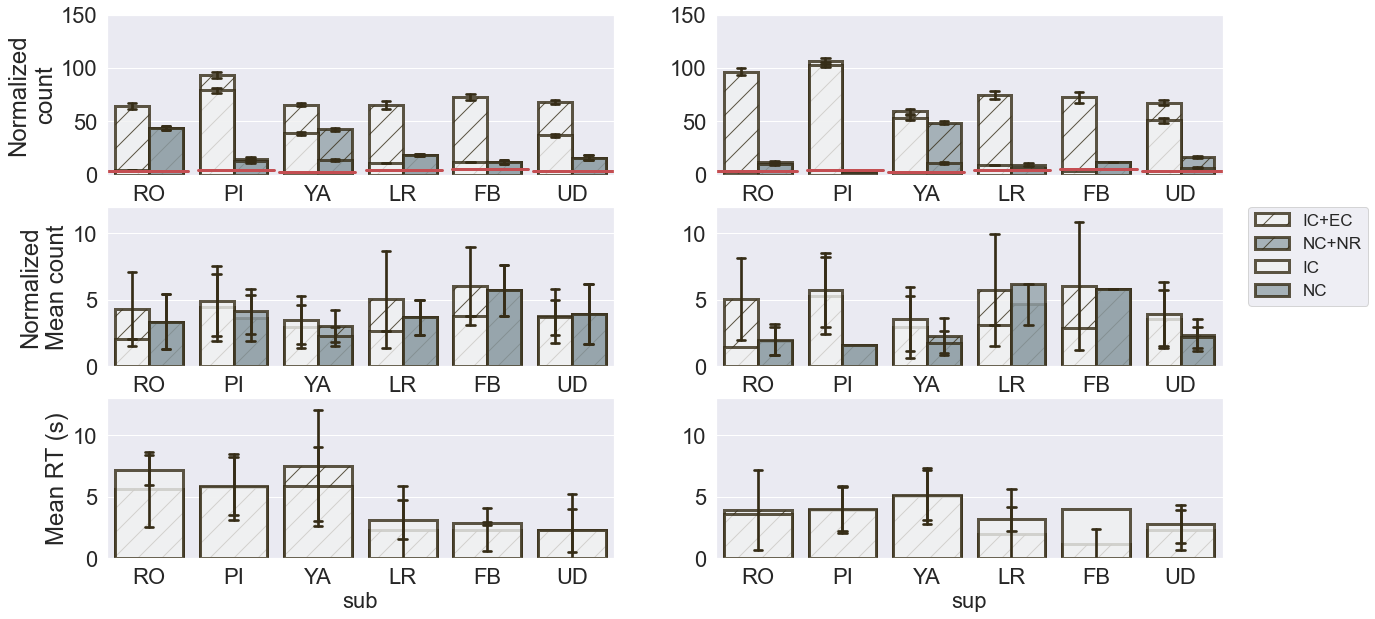

In [29]:
import itertools
from textwrap import wrap

fig, ax = plt.subplots(3, 2, figsize=(20,10))  # the right=sub, left=sup

sns.set(font_scale = 2) # default is without style and palette
#sns.color_palette("light:#90a4ae", as_cmap=True)  # Greys_d, light:#5A9

front_edge_color = "#362d17"  # '#5c7d83' #'#669999'#
back_edge_color = "#362d17"  # black

alpha = 0.8

# ----------------------------
# Summed normalized count
# ----------------------------
po = 0
#sub: count
# IC+EC and NC+NR
oo = sns.barplot(x="str", y="vals", hue="res_type", data=condensed_df_sub_2cat, ax=ax[po,0], ci="sd", capsize=.1, estimator=np.sum, palette="light:#90a4ae", errcolor=back_edge_color, linewidth=3, edgecolor=back_edge_color, alpha=alpha, linestyle='-')

num_locations = len(condensed_df_sub_2cat)
hatches = itertools.cycle(['/', '//', '+', '-', 'x', '\\', '*', 'o', 'O', '.'])
for i, bar in enumerate(oo.patches):
    if i % num_locations == 0:
        hatch = next(hatches)
    bar.set_hatch(hatch)

# IC, NC
sns.barplot(x="str", y="vals", hue="res_type", data=condensed_df_sub, ax=ax[po,0], ci="sd", capsize=.1, estimator=np.sum, palette="light:#90a4ae", errcolor=front_edge_color, linewidth=3, edgecolor=front_edge_color, alpha=alpha, linestyle='-')

ax[po,0].set(ylim=(0, 150))
ax[po,0].set_ylabel("\n".join(wrap('Normalized count', 11)))  # left
ax[po,0].set_xlabel('', fontsize=22)

# ax[cou].set_yticks([])
# Remove legend
ax[po,0].legend([],[], frameon=False)

# Put the legend out of the figure
# ax[po,0].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# ----------------------------

#sup: count
# IC+EC and NC+NR
oo = sns.barplot(x="str", y="vals", hue="res_type", data=condensed_df_sup_2cat, ax=ax[po,1], ci="sd", capsize=.1, estimator=np.sum, palette="light:#90a4ae", errcolor=back_edge_color, linewidth=3, edgecolor=back_edge_color, alpha=alpha)

num_locations = len(condensed_df_sub_2cat)
hatches = itertools.cycle(['/', '//', '+', '-', 'x', '\\', '*', 'o', 'O', '.'])
for i, bar in enumerate(oo.patches):
    if i % num_locations == 0:
        hatch = next(hatches)
    bar.set_hatch(hatch)

# IC, NC
sns.barplot(x="str", y="vals", hue="res_type", data=condensed_df_sup, ax=ax[po,1], ci="sd", capsize=.1, estimator=np.sum, palette="light:#90a4ae", errcolor=front_edge_color, linewidth=3, edgecolor=front_edge_color, alpha=alpha)

ax[po,1].set(ylim=(0, 150))
ax[po,1].set_ylabel('', fontsize=22)  # right
ax[po,1].set_xlabel('', fontsize=22)

# Remove legend
ax[po,1].legend([],[], frameon=False)

# Put the legend out of the figure
# ax[po,1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# ----------------------------

# Lower tail of 95 percent confidence interval per axis
ro_sub = condensed_df_sub_2cat.vals[(condensed_df_sub_2cat.str == 'RO')].to_numpy()
ro_sup = condensed_df_sup_2cat.vals[(condensed_df_sup_2cat.str == 'RO')].to_numpy()
pi_sub = condensed_df_sub_2cat.vals[(condensed_df_sub_2cat.str == 'PI')].to_numpy()
pi_sup = condensed_df_sup_2cat.vals[(condensed_df_sup_2cat.str == 'PI')].to_numpy()
ya_sub = condensed_df_sub_2cat.vals[(condensed_df_sub_2cat.str == 'YA')].to_numpy()
ya_sup = condensed_df_sup_2cat.vals[(condensed_df_sup_2cat.str == 'YA')].to_numpy()
lr_sub = condensed_df_sub_2cat.vals[(condensed_df_sub_2cat.str == 'LR')].to_numpy()
lr_sup = condensed_df_sup_2cat.vals[(condensed_df_sup_2cat.str == 'LR')].to_numpy()
fb_sub = condensed_df_sub_2cat.vals[(condensed_df_sub_2cat.str == 'FB')].to_numpy()
fb_sup = condensed_df_sup_2cat.vals[(condensed_df_sup_2cat.str == 'FB')].to_numpy()
ud_sub = condensed_df_sub_2cat.vals[(condensed_df_sub_2cat.str == 'UD')].to_numpy()
ud_sup = condensed_df_sup_2cat.vals[(condensed_df_sup_2cat.str == 'UD')].to_numpy()

# RO
linestyle = '-'
vec = make_a_properlist(np.concatenate((ro_sub, ro_sup), axis=0))
mean_dat, lower_tail, upper_tail = confidence_interval(vec, desired_CI=0.95)
ax[po,0].axhline(lower_tail, xmin=0, xmax=0.16, ls=linestyle, linewidth=3, color='r')
ax[po,1].axhline(lower_tail, xmin=0, xmax=0.16, ls=linestyle, linewidth=3, color='r')

# PI
vec = make_a_properlist(np.concatenate((pi_sub, pi_sup), axis=0))
mean_dat, lower_tail, upper_tail = confidence_interval(vec, desired_CI=0.95)
ax[po,0].axhline(lower_tail, xmin=0.18, xmax=0.33, ls=linestyle, linewidth=3, color='r')
ax[po,1].axhline(lower_tail, xmin=0.18, xmax=0.33, ls=linestyle, linewidth=3, color='r')

# YA
vec = make_a_properlist(np.concatenate((ya_sub, ya_sup), axis=0))
mean_dat, lower_tail, upper_tail = confidence_interval(vec, desired_CI=0.95)
ax[po,0].axhline(y=lower_tail, xmin=0.34, xmax=0.49, ls=linestyle, linewidth=3, color='r')
ax[po,1].axhline(y=lower_tail, xmin=0.34, xmax=0.49, ls=linestyle, linewidth=3, color='r')

# LR
vec = make_a_properlist(np.concatenate((lr_sub, lr_sup), axis=0))
mean_dat, lower_tail, upper_tail = confidence_interval(vec, desired_CI=0.95)
ax[po,0].axhline(y=lower_tail, xmin=0.51, xmax=0.66, ls=linestyle, linewidth=3, color='r')
ax[po,1].axhline(y=lower_tail, xmin=0.51, xmax=0.66, ls=linestyle, linewidth=3, color='r')

# FB
vec = make_a_properlist(np.concatenate((fb_sub, fb_sup), axis=0))
mean_dat, lower_tail, upper_tail = confidence_interval(vec, desired_CI=0.95)
ax[po,0].axhline(y=lower_tail, xmin=0.68, xmax=0.83, ls=linestyle, linewidth=3, color='r')
ax[po,1].axhline(y=lower_tail, xmin=0.68, xmax=0.83, ls=linestyle, linewidth=3, color='r')

# UD
vec = make_a_properlist(np.concatenate((ud_sub, ud_sup), axis=0))
mean_dat, lower_tail, upper_tail = confidence_interval(vec, desired_CI=0.95)
ax[po,0].axhline(y=lower_tail, xmin=0.84, xmax=1.0, ls=linestyle, linewidth=3, color='r')
ax[po,1].axhline(y=lower_tail, xmin=0.84, xmax=1.0, ls=linestyle, linewidth=3, color='r')

# ----------------------------
# Mean normalized count
# ----------------------------
po = 1
#sub: count
# IC+EC and NC+NR
oo = sns.barplot(x="str", y="vals", hue="res_type", data=condensed_df_sub_2cat, ax=ax[po,0], ci="sd", capsize=.1, estimator=np.mean, palette="light:#90a4ae", errcolor=back_edge_color, linewidth=3, edgecolor=back_edge_color, alpha=alpha)

num_locations = len(condensed_df_sub_2cat)
hatches = itertools.cycle(['/', '//', '+', '-', 'x', '\\', '*', 'o', 'O', '.'])
for i, bar in enumerate(oo.patches):
    if i % num_locations == 0:
        hatch = next(hatches)
    bar.set_hatch(hatch)

# IC, NC
sns.barplot(x="str", y="vals", hue="res_type", data=condensed_df_sub, ax=ax[po,0], ci="sd", capsize=.1, estimator=np.mean, palette="light:#90a4ae", errcolor=front_edge_color, linewidth=3, edgecolor=front_edge_color, alpha=alpha)

ax[po,0].set(ylim=(0, 12))
ax[po,0].set_ylabel("\n".join(wrap('Normalized Mean count', 11)))  # left
ax[po,0].set_xlabel('', fontsize=22)

# Remove legend
ax[po,0].legend([],[], frameon=False)

# Put the legend out of the figure
# ax[po,0].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# ----------------------------
#sup: count
# IC+EC and NC+NR
oo = sns.barplot(x="str", y="vals", hue="res_type", data=condensed_df_sup_2cat, ax=ax[po,1], ci="sd", capsize=.1, estimator=np.mean, palette="light:#90a4ae", errcolor=back_edge_color, linewidth=3, edgecolor=back_edge_color, alpha=alpha)

num_locations = len(condensed_df_sup_2cat)
hatches = itertools.cycle(['/', '//', '+', '-', 'x', '\\', '*', 'o', 'O', '.'])
for i, bar in enumerate(oo.patches):
    if i % num_locations == 0:
        hatch = next(hatches)
    bar.set_hatch(hatch)

# IC, NC
sns.barplot(x="str", y="vals", hue="res_type", data=condensed_df_sup, ax=ax[po,1], ci="sd", capsize=.1, estimator=np.mean, palette="light:#90a4ae", errcolor=front_edge_color, linewidth=3, edgecolor=front_edge_color, alpha=alpha)

ax[po,1].set(ylim=(0, 12))
ax[po,1].set_ylabel('', fontsize=22)  # right
ax[po,1].set_xlabel('', fontsize=22)

# Remove legend
# ax[po,1].legend([],[], frameon=False)

# Put the legend out of the figure
ax[po,1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=17)

# ----------------------------



# ----------------------------
# Mean RT
# ----------------------------
po = 2
#sub: RT
# IC+EC
oo = sns.barplot(x="str", y="vals", hue="res_type", data=condensed_df_subTR_2cat, ax=ax[po,0], ci="sd", capsize=.1, estimator=np.mean, palette="light:#90a4ae", errcolor=back_edge_color, linewidth=3, edgecolor=back_edge_color, alpha=alpha)

num_locations = len(condensed_df_sub_2cat)
hatches = itertools.cycle(['/', '//', '+', '-', 'x', '\\', '*', 'o', 'O', '.'])
for i, bar in enumerate(oo.patches):
    if i % num_locations == 0:
        hatch = next(hatches)
    bar.set_hatch(hatch)

# IC
sns.barplot(x="str", y="vals", hue="res_type", data=condensed_df_subTR, ax=ax[po,0], ci="sd", capsize=.1, estimator=np.mean, palette="light:#90a4ae", errcolor=front_edge_color, linewidth=3, edgecolor=front_edge_color, alpha=alpha)

ax[po,0].set(ylim=(0, 13))
ax[po,0].set_ylabel("\n".join(wrap('Mean RT (s)', 11)))  # left
ax[po,0].set_xlabel('sub', fontsize=22)

# Remove legend
ax[po,0].legend([],[], frameon=False)

# Put the legend out of the figure
# ax[po,0].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# ----------------------------
#sup: RT
# IC+EC
oo = sns.barplot(x="str", y="vals", hue="res_type", data=condensed_df_supTR_2cat, ax=ax[po,1], ci="sd", capsize=.1, estimator=np.mean, palette="light:#90a4ae", errcolor=back_edge_color, linewidth=3, edgecolor=back_edge_color, alpha=alpha)

num_locations = len(condensed_df_sup_2cat)
hatches = itertools.cycle(['/', '//', '+', '-', 'x', '\\', '*', 'o', 'O', '.'])
for i, bar in enumerate(oo.patches):
    if i % num_locations == 0:
        hatch = next(hatches)
    bar.set_hatch(hatch)

# IC
sns.barplot(x="str", y="vals", hue="res_type", data=condensed_df_supTR, ax=ax[po,1], ci="sd", capsize=.1, estimator=np.mean, palette="light:#90a4ae", errcolor=front_edge_color, linewidth=3, edgecolor=front_edge_color, alpha=alpha)

ax[po,1].set(ylim=(0, 13))
ax[po,1].set_ylabel('', fontsize=22)  # right
ax[po,1].set_xlabel('sup', fontsize=22)

# Remove legend
ax[po,1].legend([],[], frameon=False)

# Put the legend out of the figure
# ax[po,1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# ----------------------------  


plt.xticks(fontsize=22)

plt.savefig('Final_count_TR_rot_trans.png')